In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# FilePath to Stats

In [3]:
mypath = r"C:\Users\Mummel\Desktop\BeatManiaStats Others"  # write your own path here
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

In [4]:
onlyfiles
beat_metrics = [f for f in onlyfiles if "Beat_Metric" in f]
combat_metrics = [f for f in onlyfiles if "Combat_Metric" in f]
various_metrics = [f for f in onlyfiles if "Various_Metric" in f]
print(beat_metrics)

['000990_NoRhythm_04_12_21_12_39_Beat_Metric.csv', '000990_RhythmControlled_04_12_21_12_11_Beat_Metric.csv', '061295_NoRhythm_05_12_21_05_27_Beat_Metric.csv', '061295_RhythmControlled_05_12_21_05_53_Beat_Metric.csv', '088835_NoRhythm_21_11_21_05_42_Beat_Metric.csv', '088835_RhythmControlled_21_11_21_05_13_Beat_Metric.csv', '157771_NoRhythm_02_12_21_06_04_Beat_Metric.csv', '157771_RhythmControlled_02_12_21_06_35_Beat_Metric.csv', '198760_NoRhythm_06_12_21_06_35_Beat_Metric.csv', '198760_RhythmControlled_06_12_21_07_06_Beat_Metric.csv', '244206_NoRhythm_03_12_21_03_22_Beat_Metric.csv', '244206_RhythmControlled_03_12_21_03_50_Beat_Metric.csv', '246229_NoRhythm_02_12_21_04_03_Beat_Metric.csv', '246229_RhythmControlled_02_12_21_04_30_Beat_Metric.csv', '288786_NoRhythm_05_12_21_04_49_Beat_Metric.csv', '288786_RhythmControlled_05_12_21_04_21_Beat_Metric.csv', '353252_NoRhythm_05_12_21_04_39_Beat_Metric.csv', '353252_RhythmControlled_05_12_21_04_13_Beat_Metric.csv', '427217_NoRhythm_04_12_21_0

# fix writing mistakes in beat metrics (if you haven't already)

In [173]:

#fix Beat_metric files
already_fixed = 0
NaN_removed = 0
old_version_fixed = 0

def beat_delta_fix(text):
    if "." in text:
        text = text.split(".")[0]
        #print("beat_delta_fix")
    return text

#o = [beat_metrics[7]]
for file in beat_metrics:
    path = os.path.join(mypath, file)
    #print(file)
    if "Beat_Metric" in path:
        try:
            df = pd.read_csv(path,sep=',', skiprows = 2, header = None)
        except:
            df = pd.read_csv(path,sep=',', skiprows = 3, header = None) # remove instances where first data row contains NaN
            NaN_removed += 1
        if len(df.columns) == 10:
            df.columns = ["Version", "Time", "Beathit", "BeatDelta", "BeatDelta2", "BeatLength", "BeatLength2", "ToleranceRange", "ToleranceRange2", "Action"]
            df["BeatDelta2"] = df["BeatDelta2"].astype(str).apply(beat_delta_fix)
            df["BeatDelta"] = df["BeatDelta"].astype(str) + '.' + df.pop("BeatDelta2").astype(str)
            df["BeatLength"] = df["BeatLength"].astype(str) + '.' + df.pop("BeatLength2").astype(str)
            df["ToleranceRange"] = df["ToleranceRange"].astype(str) + '.' + df.pop("ToleranceRange2").astype(str)
            f = open(path,"w")
            f.write("sep=,\n")
            df.to_csv(f, index = False,line_terminator='\n',sep=',')
            f.close()
            old_version_fixed += 1
        else:
            already_fixed += 1

print("NaN removed", NaN_removed)
print("old version fixed", old_version_fixed)
print("already fixed", already_fixed)

NaN removed 0
old version fixed 0
already fixed 42


# BeatMetric Analysis

In [26]:
# beat_metric analysis
path = os.path.join(mypath, beat_metrics[0])
df = pd.read_csv(path,sep=',', skiprows = 1)
print(path)
df

C:\Users\Mummel\Desktop\BeatManiaStats Others\000990_NoRhythm_04_12_21_12_39_Beat_Metric.csv


Version  Time  Beathit  BeatDelta  BeatLength  ToleranceRange  \
0    NoRhythm     1    False   0.189819         0.5        0.141453   
1    NoRhythm     1     True   0.239258         0.5        0.141453   
2    NoRhythm     2     True   0.728760         0.5        0.141453   
3    NoRhythm     3    False   0.222656         0.5        0.141453   
4    NoRhythm     4     True   0.139282         0.5        0.141453   
..        ...   ...      ...        ...         ...             ...   
711  NoRhythm  1202    False   0.180564         0.6        0.141453   
712  NoRhythm  1204    False   0.396921         0.6        0.141453   
713  NoRhythm  1204    False   0.230271         0.6        0.141453   
714  NoRhythm  1207    False   0.197068         0.6        0.141453   
715  NoRhythm  1210    False   0.196970         0.6        0.141453   

                           Action  
0                            Jump  
1                     Double Jump  
2    Player Attack StrongAttack 1  
3                            Jump  
4                     Double Jump  
..                            ...  
711                          Jump  
712                          Jump  
713                   Double Jump  
714                 Player Shield  
715                 Player Shield  

[716 rows x 7 columns]

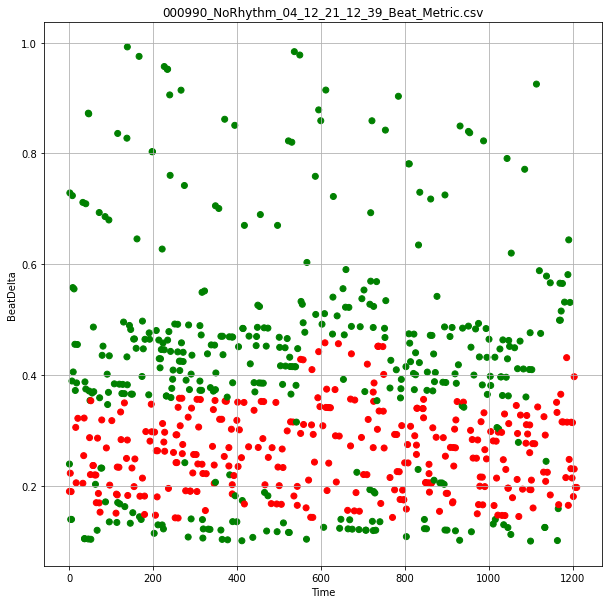

hits: 398/716 = 0.56
hits: 456/828 = 0.55


In [5]:
def files(index):
    df_beat = pd.read_csv(os.path.join(mypath, beat_metrics[index]),sep=',', skiprows = 1)
    df_various = pd.read_csv(os.path.join(mypath, various_metrics[index]),sep=',', skiprows = 1)
    df_combat = pd.read_csv(os.path.join(mypath, combat_metrics[index]),sep=',', skiprows = 1)
    return df_beat, df_various, df_combat
index = 0

df_beat, df_various, df_combat = files(index)
#df = pd.read_csv(os.path.join(mypath, beat_metrics[7]),sep=',', skiprows = 1)


# beat-deltas colored. green is hit and red is no hit
fig, ax=plt.subplots(figsize=(10,10))
colors = np.where(df_beat["Beathit"], "green", "red")
ax.scatter(df_beat["Time"],df_beat["BeatDelta"], color = colors)
ax.set_title(beat_metrics[index])
ax.set_ylabel("BeatDelta")
ax.set_xlabel("Time")
ax.grid(True)
plt.show()

# percantage of hits for rhythm controlled and No Rhythm
def hit_percentage(df_beat):
    hit = np.count_nonzero(df_beat["Beathit"])
    cnt = len(df_beat["Beathit"])
    print(f"hits: {hit}/{cnt} = {round(hit/cnt,2)}")
    
hit_percentage(df_beat)

df_beat, df_various, df_combat = files(index+1)
hit_percentage(df_beat)


In [7]:
beat_metrics_no_rhythm = [f for f in beat_metrics if "NoRhythm" in f]

ar = []
for f in beat_metrics_no_rhythm:
    df_beat = pd.read_csv(os.path.join(mypath, f),sep=',', skiprows = 1)

    hit = np.count_nonzero(df_beat["Beathit"])
    cnt = len(df_beat["Beathit"])
    ar.append(round(hit/cnt,2))

ar = np.array(ar)
print("Beat beat hits No Rhythm",np.average(ar))

beat_metrics_controlled = [f for f in beat_metrics if "Controlled" in f]

ar = []
for f in beat_metrics_controlled:
    df_beat = pd.read_csv(os.path.join(mypath, f),sep=',', skiprows = 1)

    hit = np.count_nonzero(df_beat["Beathit"])
    cnt = len(df_beat["Beathit"])
    ar.append(round(hit/cnt,2))

ar = np.array(ar)
print("Beat beat hits Rhythm Controlled",np.average(ar))
# beat hits in No Rhythm vs in Rhythm Controlled. 
# in Rhythm controlled people hit on the rhythm more. 

Beat beat hits No Rhythm 0.3990476190476191
Beat beat hits Rhythm Controlled 0.5247619047619048


[[0.62 0.66 0.57 0.61 0.56 0.56 0.46 0.58 0.51 0.38]
 [0.41 0.38 0.4  0.35 0.35 0.39 0.4  0.36 0.3  0.38]
 [0.35 0.33 0.46 0.37 0.47 0.39 0.49 0.32 0.49 0.41]
 [0.47 0.34 0.53 0.42 0.45 0.36 0.43 0.34 0.46 0.41]
 [0.39 0.36 0.26 0.42 0.31 0.32 0.37 0.44 0.27 0.35]
 [0.54 0.3  0.32 0.41 0.35 0.42 0.49 0.4  0.4  0.48]
 [0.54 0.43 0.34 0.41 0.34 0.39 0.43 0.34 0.42 0.43]
 [0.44 0.32 0.31 0.36 0.21 0.23 0.31 0.48 0.45 0.41]
 [0.29 0.31 0.34 0.44 0.49 0.5  0.37 0.45 0.36 0.45]
 [0.38 0.35 0.36 0.33 0.42 0.43 0.22 0.47 0.27 0.19]
 [0.44 0.43 0.41 0.43 0.38 0.43 0.42 0.42 0.52 0.4 ]
 [0.44 0.38 0.3  0.41 0.41 0.41 0.35 0.35 0.4  0.37]
 [0.51 0.32 0.38 0.34 0.6  0.42 0.4  0.38 0.25 0.42]
 [0.36 0.4  0.47 0.4  0.32 0.26 0.21 0.31 0.31 0.35]
 [0.29 0.37 0.44 0.38 0.45 0.35 0.44 0.31 0.3  0.41]
 [0.46 0.35 0.45 0.35 0.36 0.48 0.48 0.4  0.5  0.41]
 [0.38 0.39 0.36 0.31 0.35 0.35 0.51 0.42 0.44 0.39]
 [0.41 0.34 0.28 0.31 0.35 0.37 0.4  0.32 0.33 0.38]
 [0.39 0.34 0.19 0.35 0.35 0.33 0.5  0.43 0.4 

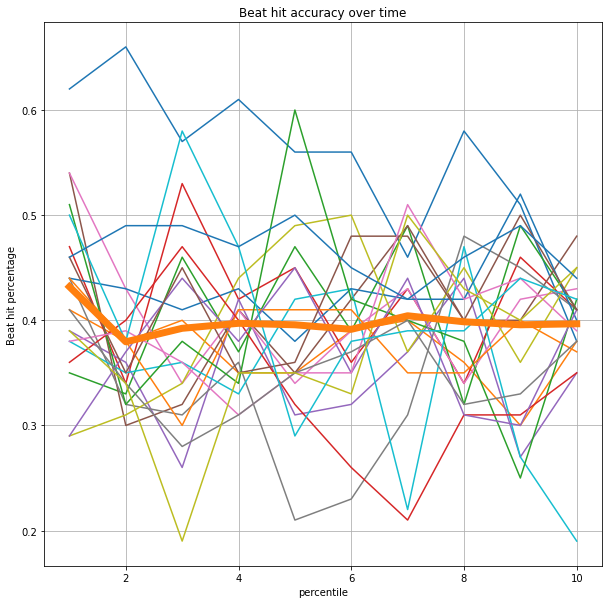

In [8]:
# Beat hits Percentile 
# comparison no rhythm and rhythm controlled. Do they get better? 
fig, ax=plt.subplots(figsize=(10,10))

divisions = 10
all_avg = []
for f in beat_metrics_no_rhythm:
    
    df_beat = pd.read_csv(os.path.join(mypath, f),sep=',', skiprows = 1)
    time = np.array(df_beat["Time"])
    hits = np.array(df_beat["Beathit"])
    percentile = time.max()/divisions
    #print(percentile)
    avg = []
    #print(time.max())
    for i in range(divisions):
        #print(i, "low",i* percentile,"high", (i+1)* percentile)
        time_filter_low = (i* percentile) < time
        time_filter_high = time < ((i+1)* percentile)
        time_filter = np.logical_and(time_filter_low, time_filter_high)
        #print(list(zip(time_filter,time)))
        this_percentile = hits[time_filter]
        #print(len(this_percentile))
        if len(this_percentile) == 0:
            avg.append(0)
        else:
            avg.append(round(np.count_nonzero(this_percentile)/len(this_percentile),2))
    #print(avg)
    ax.plot(np.arange(1,divisions+1),avg)
    all_avg.append(avg)

all_avg = np.array(all_avg)
print(all_avg)
np.mean(all_avg, axis = 0)
ax.plot(np.arange(1,divisions+1),np.mean(all_avg, axis = 0),linewidth=7.0)    
    
ax.set_title("Beat hit accuracy over time")
ax.set_ylabel("Beat hit percentage")
ax.set_xlabel("percentile")
ax.grid(True)
plt.show()    
    

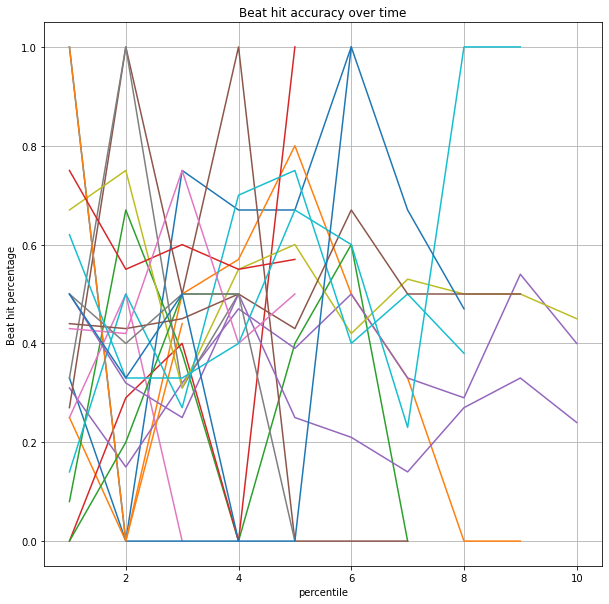

In [9]:
fig, ax=plt.subplots(figsize=(10,10))

divisions = 10
all_avg = []
for f in beat_metrics_controlled:
    
    df_beat = pd.read_csv(os.path.join(mypath, f),sep=',', skiprows = 1)
    df_beat = df_beat[df_beat["Action"].isin(["Player Shield"])]
    time = np.array(df_beat["Time"])
    hits = np.array(df_beat["Beathit"])
    percentile = time.max()/divisions
    #print(percentile)
    avg = []
    #print(time.max())
    for i in range(divisions):
        #print(i, "low",i* percentile,"high", (i+1)* percentile)
        time_filter_low = (i* percentile) < time
        time_filter_high = time < ((i+1)* percentile)
        time_filter = np.logical_and(time_filter_low, time_filter_high)
        #print(list(zip(time_filter,time)))
        this_percentile = hits[time_filter]
        #print(len(this_percentile))
        if len(this_percentile) == 0:
            #avg.append(0)
            pass
        else:
            avg.append(round(np.count_nonzero(this_percentile)/len(this_percentile),2))
    #print(avg)
    ax.plot(np.arange(1,len(avg)+1),avg)
    all_avg.append(avg)

#all_avg = np.array(all_avg)
#print(all_avg)
#np.mean(all_avg, axis = 0)
#ax.plot(np.arange(1,divisions+1),np.mean(all_avg, axis = 0),linewidth=7.0)
ax.set_title("Beat hit accuracy over time")
ax.set_ylabel("Beat hit percentage")
ax.set_xlabel("percentile")
ax.grid(True)
plt.show()  

[[0.76 0.46 0.6  0.56 0.57 0.6  0.62 0.52 0.59 0.62]
 [0.51 0.42 0.49 0.51 0.59 0.71 0.62 0.66 0.69 0.59]
 [0.41 0.35 0.39 0.48 0.41 0.47 0.35 0.5  0.27 0.4 ]
 [0.39 0.33 0.3  0.48 0.44 0.41 0.55 0.5  0.67 0.41]
 [0.55 0.35 0.51 0.52 0.35 0.45 0.53 0.38 0.67 0.4 ]
 [0.56 0.7  0.6  0.74 0.69 0.87 0.8  0.88 0.78 0.76]
 [0.41 0.37 0.29 0.38 0.26 0.42 0.49 0.44 0.4  0.4 ]
 [0.51 0.53 0.33 0.5  0.26 0.41 0.35 0.43 0.4  0.49]
 [0.57 0.69 0.57 0.56 0.53 0.65 0.62 0.65 0.61 0.56]
 [0.32 0.37 0.38 0.33 0.41 0.39 0.46 0.43 0.48 0.55]
 [0.63 0.66 0.64 0.67 0.64 0.54 0.55 0.63 0.58 0.42]
 [0.45 0.62 0.63 0.74 0.58 0.69 0.78 0.88 0.8  0.82]
 [0.64 0.48 0.4  0.46 0.43 0.53 0.63 0.62 0.47 0.48]
 [0.54 0.5  0.6  0.63 0.65 0.53 0.67 0.64 0.52 0.65]
 [0.42 0.26 0.47 0.38 0.25 0.38 0.33 0.44 0.32 0.34]
 [0.63 0.31 0.52 0.59 0.57 0.37 0.43 0.68 0.58 0.66]
 [0.53 0.51 0.58 0.48 0.55 0.75 0.68 0.62 0.72 0.72]
 [0.47 0.28 0.51 0.21 0.31 0.48 0.68 0.55 0.53 0.71]
 [0.4  0.53 0.57 0.39 0.32 0.45 0.36 0.45 0.48

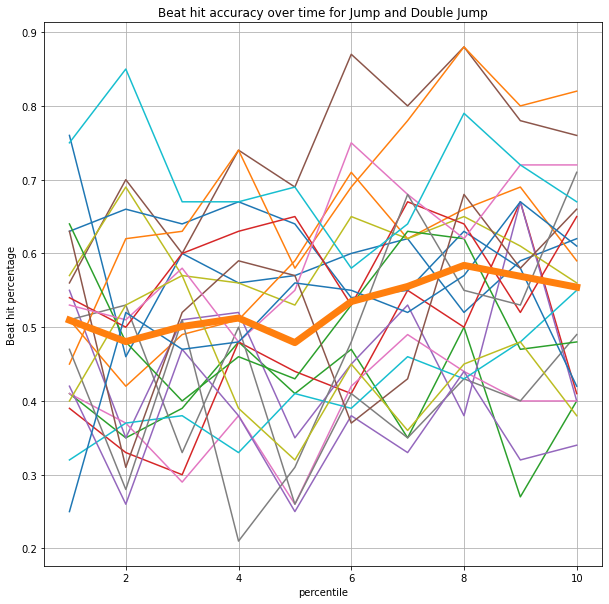

In [14]:
# only jumping actions

fig, ax=plt.subplots(figsize=(10,10))

divisions = 10
all_avg = []
for f in beat_metrics_controlled:
    
    df_beat = pd.read_csv(os.path.join(mypath, f),sep=',', skiprows = 1)
    df_beat = df_beat[df_beat["Action"].isin(["Double Jump", "Jump"])]
    #print(df_beat)
    time = np.array(df_beat["Time"])
    hits = np.array(df_beat["Beathit"])
    percentile = time.max()/divisions
    #print(percentile)
    avg = []
    #print(time.max())
    for i in range(divisions):
        #print(i, "low",i* percentile,"high", (i+1)* percentile)
        time_filter_low = (i* percentile) < time
        time_filter_high = time < ((i+1)* percentile)
        time_filter = np.logical_and(time_filter_low, time_filter_high)
        #print(list(zip(time_filter,time)))
        this_percentile = hits[time_filter]
        #print(len(this_percentile))
        if len(this_percentile) == 0:
            avg.append(0)
        else:
            avg.append(round(np.count_nonzero(this_percentile)/len(this_percentile),2))
    #print(avg)
    ax.plot(np.arange(1,divisions+1),avg)
    all_avg.append(avg)

all_avg = np.array(all_avg)
print(all_avg)
np.mean(all_avg, axis = 0)
ax.plot(np.arange(1,divisions+1),np.mean(all_avg, axis = 0),linewidth=7.0)
ax.set_title("Beat hit accuracy over time for Jump and Double Jump")
ax.set_ylabel("Beat hit percentage")
ax.set_xlabel("percentile")
ax.grid(True)
plt.show()  

BeatMetric Things

missedBySeconds is beatdelta

b = missedBySeconds <= (ToleranceRange + toleranceShift) || missedBySeconds >= beatLength - (ToleranceRange - toleranceShift)

Attacks that you cannot miss:
["Player Attack SpinAttack","Player Attack StaggerAttack 3","Player Attack WindUpAttack 2","Player Attack StrongAttack 1"]

Attack that you allways miss: 
["Player Attack Weak Attack"]

Attack you can both fail and hit:
["Player Attack Dash"]

Jumps
["Jump", "Double Jump"]
You can hit/fail both jump types

Independant of Beat:
["Player Shielded"]




In [38]:
# beat-deltas colored. green is hit and red is no hit
#print(df_beat)

def Analyse(beat, various, combat):
    print(beat, various, combat)
    
    df_various = pd.read_csv(os.path.join(mypath, various), sep=',', skiprows = 1)
    df_various = df_various[df_various["Action"].isin(["Keyboard & Mouse", "Gamepad"])]
    
    print(df_various)
    
    fig, ax=plt.subplots(nrows = 1, ncols = 2 ,figsize=(20,10))
    df_beat = pd.read_csv(os.path.join(mypath, beat), sep=',', skiprows = 1)
    df_beat = df_beat[df_beat["Action"].isin(["Double Jump", "Jump"])]
    colors = np.where(df_beat["Beathit"], "green", "red")
    ax[0].scatter(df_beat["Time"],df_beat["BeatDelta"], color = colors)
    ax[0].set_title(beat+" Jumps")
    ax[0].set_ylabel("BeatDelta")
    ax[0].set_xlabel("Time")
    ax[0].grid(True)

    df_beat = pd.read_csv(os.path.join(mypath, beat), sep=',', skiprows = 1)
    df_beat = df_beat[df_beat["Action"].isin(["Player Attack Dash","Player Attack Weak Attack","Player Attack SpinAttack","Player Attack StaggerAttack 3","Player Attack WindUpAttack 2","Player Attack StrongAttack 1"])]
    colors = np.where(df_beat["Beathit"], "green", "red")
    ax[1].scatter(df_beat["Time"],df_beat["BeatDelta"], color = colors)
    ax[1].set_title(beat+" Attacks")
    ax[1].set_ylabel("BeatDelta")
    ax[1].set_xlabel("Time")
    ax[1].grid(True)

    plt.show()

    

000990_NoRhythm_04_12_21_12_39_Beat_Metric.csv 000990_NoRhythm_04_12_21_12_39_Various_Metric.csv 000990_NoRhythm_04_12_21_12_39_Combat_Metric.csv
      Version  Time            Action
0    NoRhythm    10  Keyboard & Mouse
2    NoRhythm     1           Gamepad
93   NoRhythm   425  Keyboard & Mouse
95   NoRhythm   427           Gamepad
220  NoRhythm  1213  Keyboard & Mouse


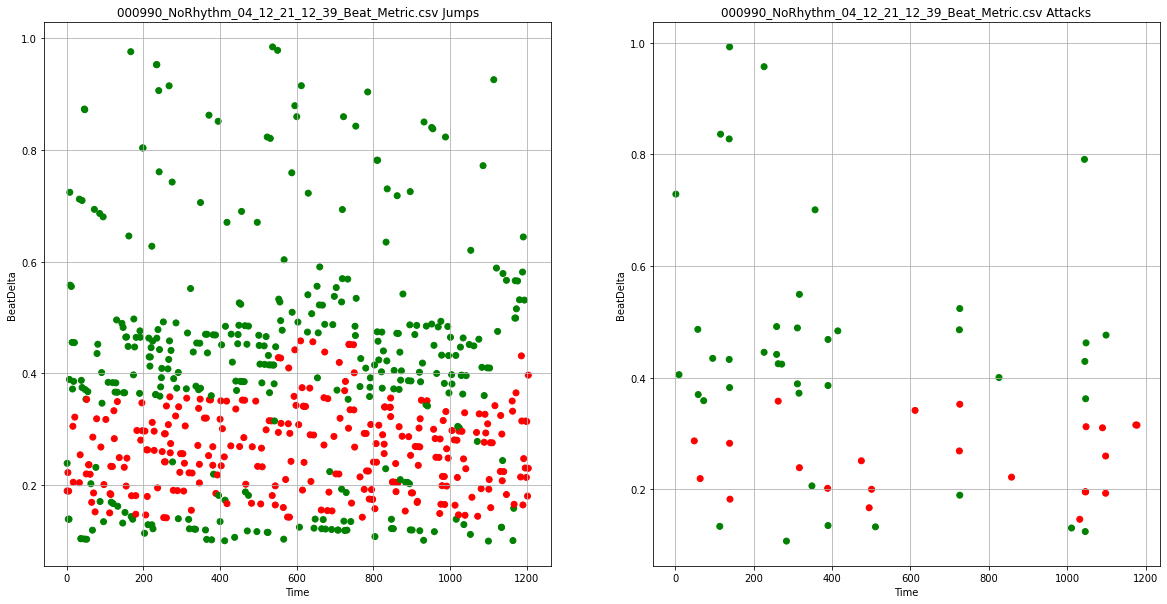

000990_RhythmControlled_04_12_21_12_11_Beat_Metric.csv 000990_RhythmControlled_04_12_21_12_11_Various_Metric.csv 000990_RhythmControlled_04_12_21_12_11_Combat_Metric.csv
              Version  Time            Action
0    RhythmControlled    25  Keyboard & Mouse
3    RhythmControlled     1           Gamepad
8    RhythmControlled    41  Keyboard & Mouse
12   RhythmControlled    42           Gamepad
35   RhythmControlled   207  Keyboard & Mouse
37   RhythmControlled   208           Gamepad
38   RhythmControlled   208  Keyboard & Mouse
41   RhythmControlled   208           Gamepad
197  RhythmControlled  1180  Keyboard & Mouse


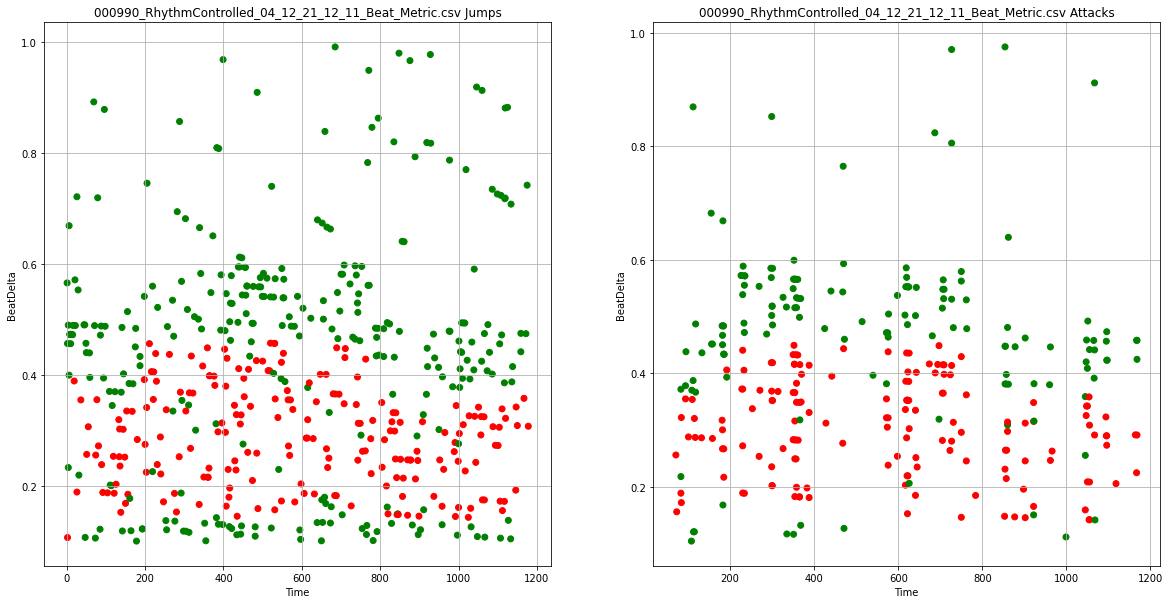

061295_NoRhythm_05_12_21_05_27_Beat_Metric.csv 061295_NoRhythm_05_12_21_05_27_Various_Metric.csv 061295_NoRhythm_05_12_21_05_27_Combat_Metric.csv
    Version  Time            Action
0  NoRhythm    18  Keyboard & Mouse
2  NoRhythm     2           Gamepad


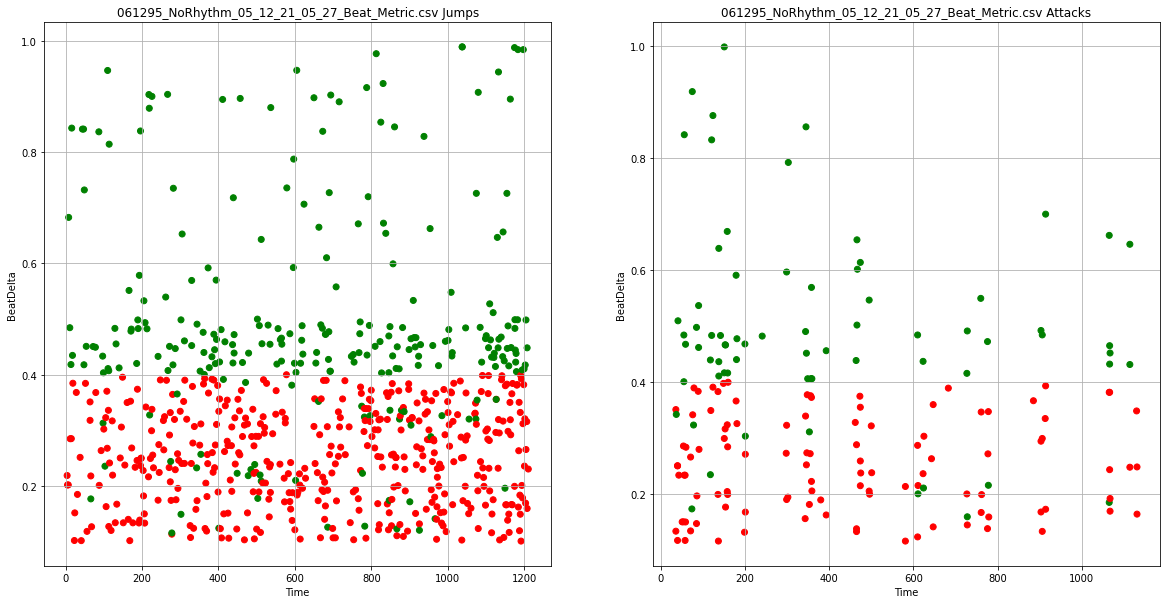

061295_RhythmControlled_05_12_21_05_53_Beat_Metric.csv 061295_RhythmControlled_05_12_21_05_53_Various_Metric.csv 061295_RhythmControlled_05_12_21_05_53_Combat_Metric.csv
            Version  Time            Action
0  RhythmControlled    34  Keyboard & Mouse
1  RhythmControlled     0           Gamepad


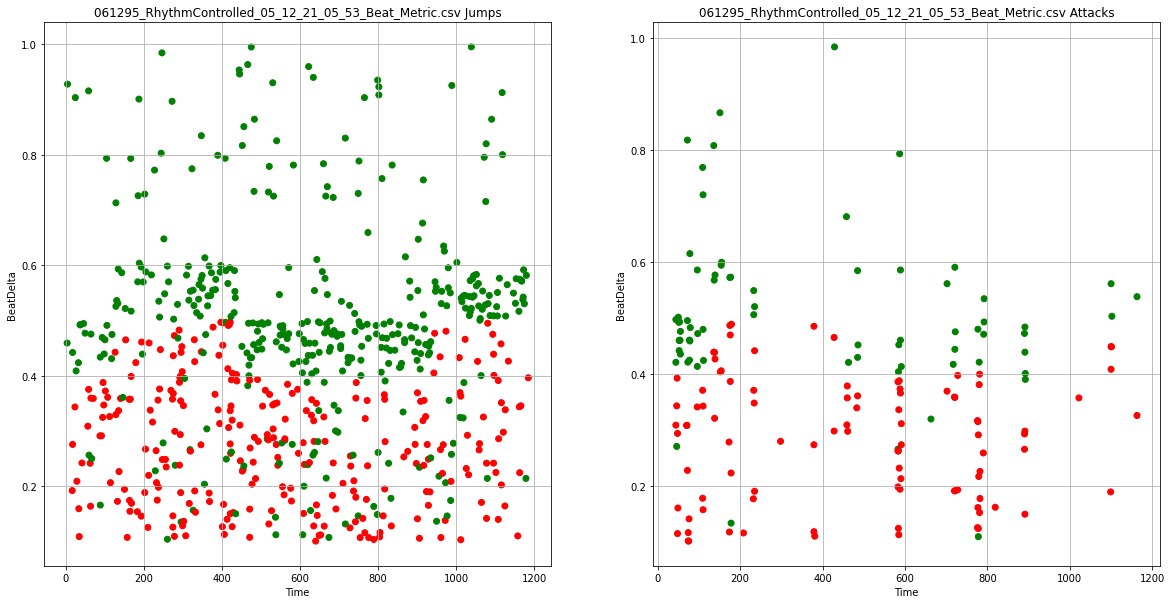

088835_NoRhythm_21_11_21_05_42_Beat_Metric.csv 088835_NoRhythm_21_11_21_05_42_Various_Metric.csv 088835_NoRhythm_21_11_21_05_42_Combat_Metric.csv
Empty DataFrame
Columns: [Version, Time, Action]
Index: []


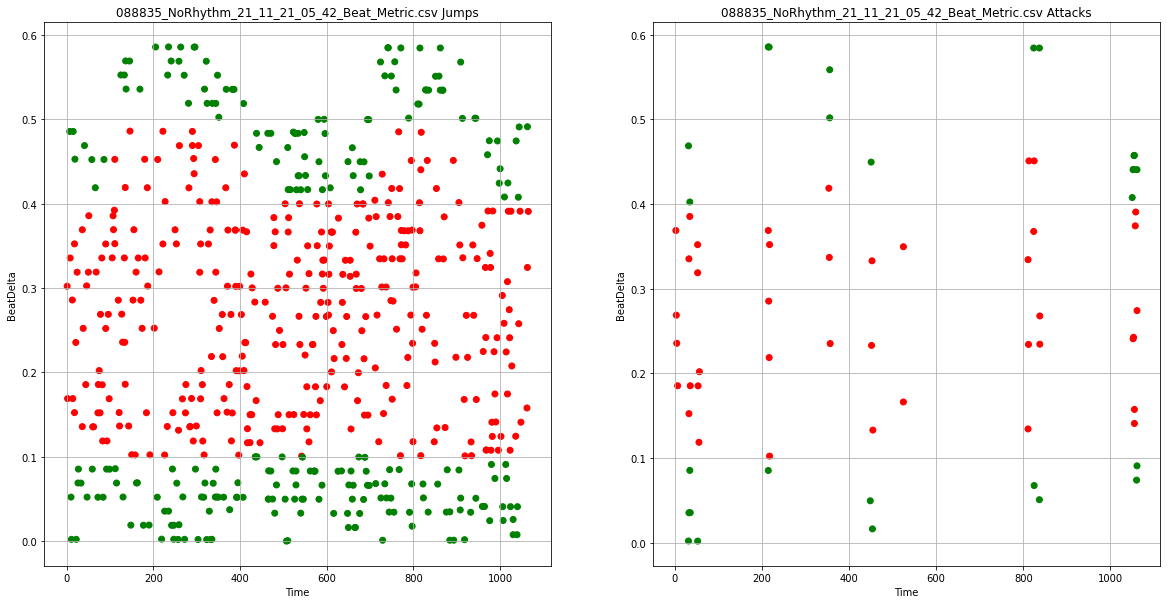

088835_RhythmControlled_21_11_21_05_13_Beat_Metric.csv 088835_RhythmControlled_21_11_21_05_13_Various_Metric.csv 088835_RhythmControlled_21_11_21_05_13_Combat_Metric.csv
Empty DataFrame
Columns: [Version, Time, Action]
Index: []


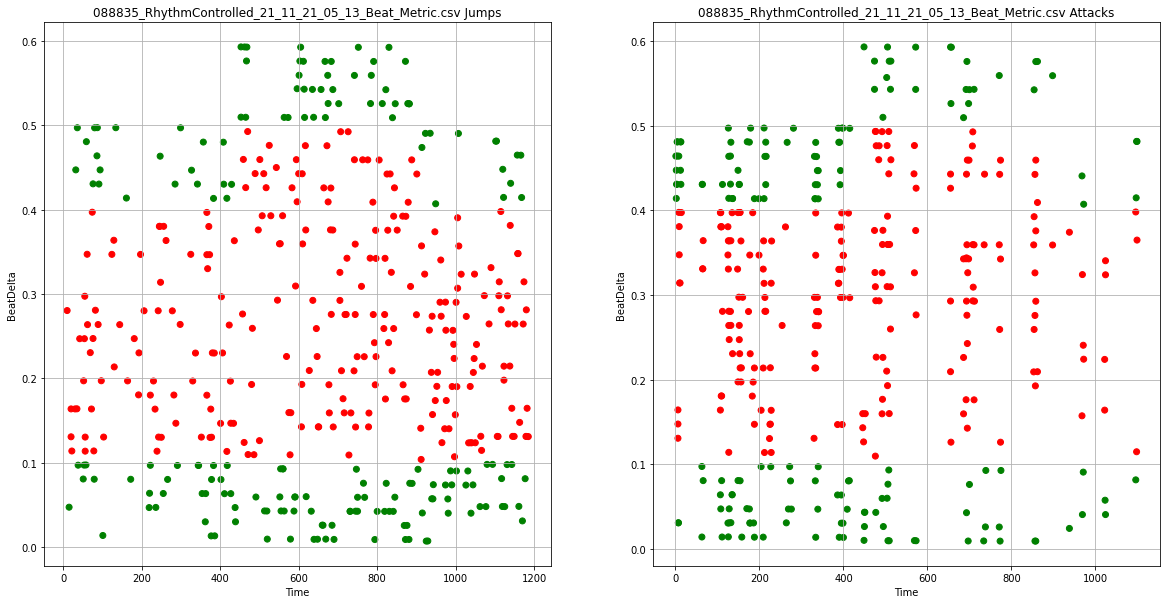

157771_NoRhythm_02_12_21_06_04_Beat_Metric.csv 157771_NoRhythm_02_12_21_06_04_Various_Metric.csv 157771_NoRhythm_02_12_21_06_04_Combat_Metric.csv
     Version  Time            Action
0   NoRhythm    20  Keyboard & Mouse
1   NoRhythm     0           Gamepad
78  NoRhythm   765  Keyboard & Mouse
79  NoRhythm   766           Gamepad
80  NoRhythm   766  Keyboard & Mouse
81  NoRhythm   766           Gamepad


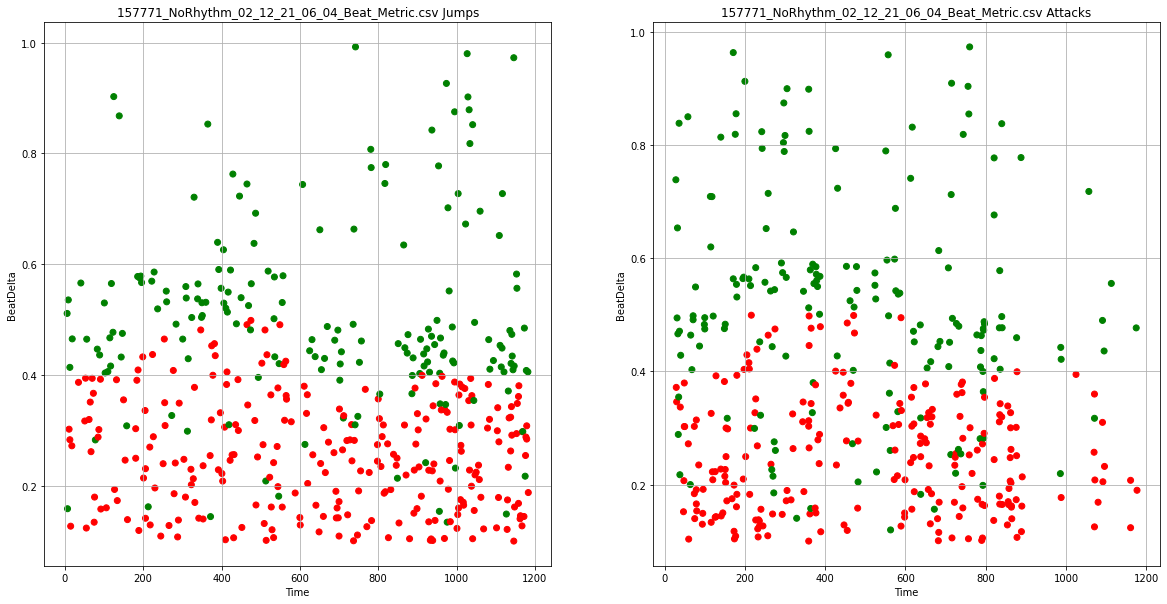

157771_RhythmControlled_02_12_21_06_35_Beat_Metric.csv 157771_RhythmControlled_02_12_21_06_35_Various_Metric.csv 157771_RhythmControlled_02_12_21_06_35_Combat_Metric.csv
             Version  Time            Action
0   RhythmControlled    31  Keyboard & Mouse
1   RhythmControlled     0           Gamepad
38  RhythmControlled   275  Keyboard & Mouse
39  RhythmControlled   275           Gamepad
58  RhythmControlled   658  Keyboard & Mouse


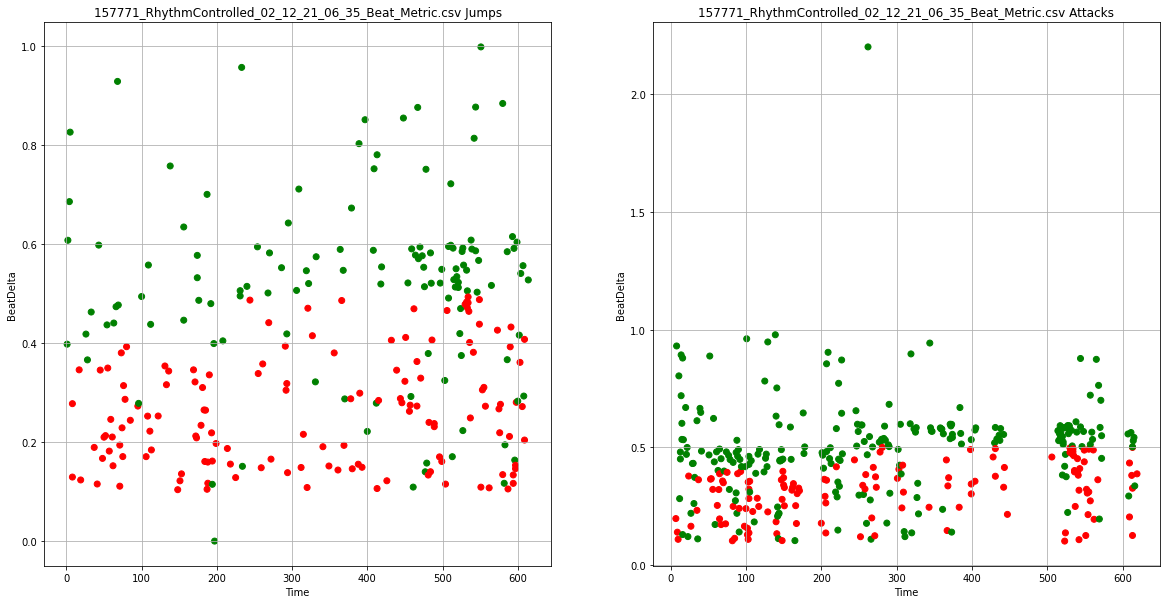

198760_NoRhythm_06_12_21_06_35_Beat_Metric.csv 198760_NoRhythm_06_12_21_06_35_Various_Metric.csv 198760_NoRhythm_06_12_21_06_35_Combat_Metric.csv
      Version  Time            Action
0    NoRhythm    35  Keyboard & Mouse
1    NoRhythm     0           Gamepad
165  NoRhythm  1205  Keyboard & Mouse
166  NoRhythm  1205           Gamepad


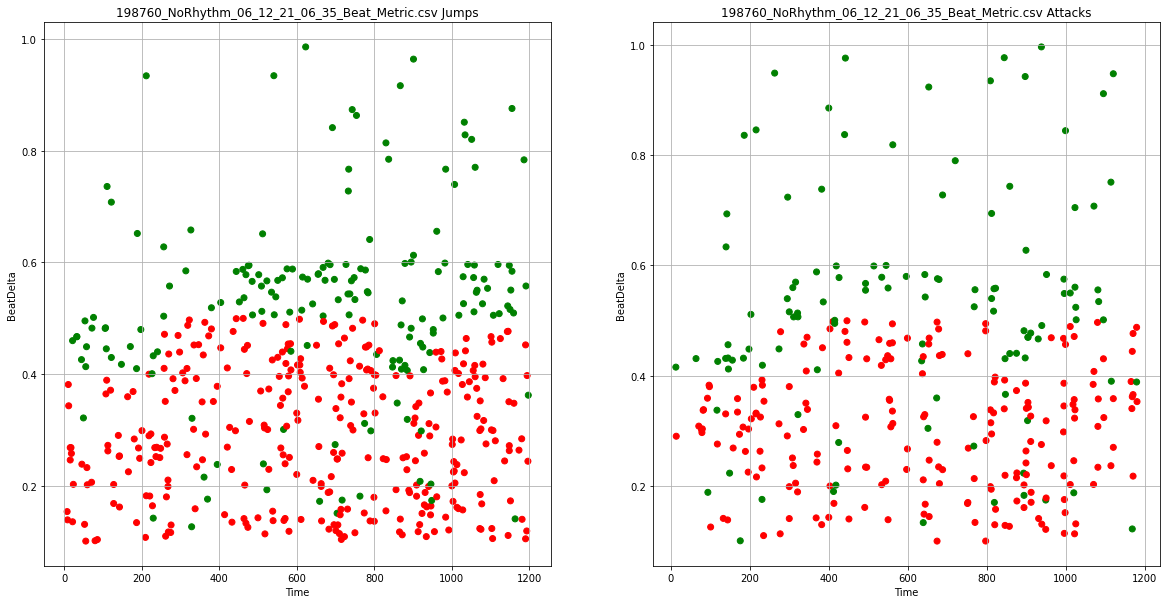

198760_RhythmControlled_06_12_21_07_06_Beat_Metric.csv 198760_RhythmControlled_06_12_21_07_06_Various_Metric.csv 198760_RhythmControlled_06_12_21_07_06_Combat_Metric.csv
              Version  Time            Action
0    RhythmControlled    19  Keyboard & Mouse
3    RhythmControlled     1           Gamepad
174  RhythmControlled  1128  Keyboard & Mouse
176  RhythmControlled  1128           Gamepad


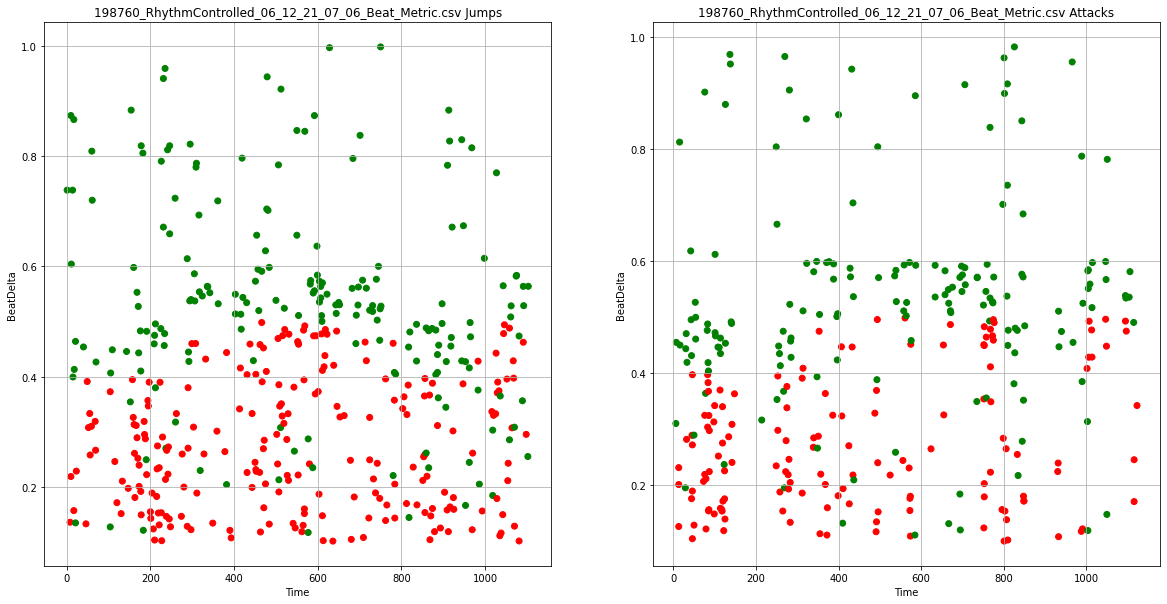

244206_NoRhythm_03_12_21_03_22_Beat_Metric.csv 244206_NoRhythm_03_12_21_03_22_Various_Metric.csv 244206_NoRhythm_03_12_21_03_22_Combat_Metric.csv
      Version  Time            Action
0    NoRhythm    11  Keyboard & Mouse
2    NoRhythm     1           Gamepad
180  NoRhythm  1206  Keyboard & Mouse


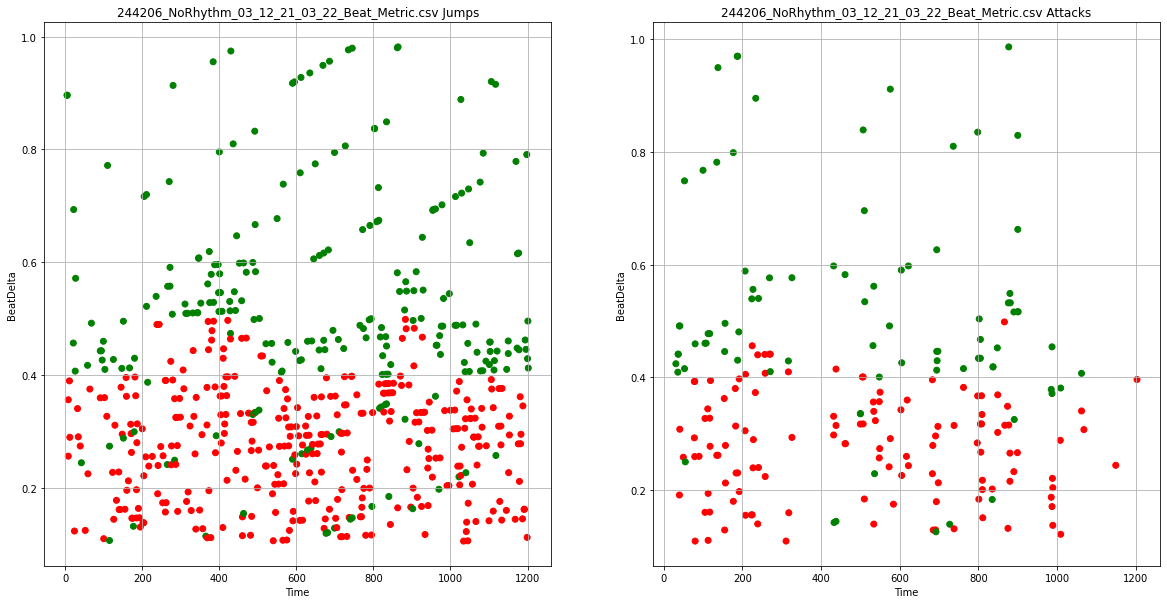

244206_RhythmControlled_03_12_21_03_50_Beat_Metric.csv 244206_RhythmControlled_03_12_21_03_50_Various_Metric.csv 244206_RhythmControlled_03_12_21_03_50_Combat_Metric.csv
              Version  Time            Action
0    RhythmControlled    11  Keyboard & Mouse
2    RhythmControlled     0           Gamepad
156  RhythmControlled  1170  Keyboard & Mouse


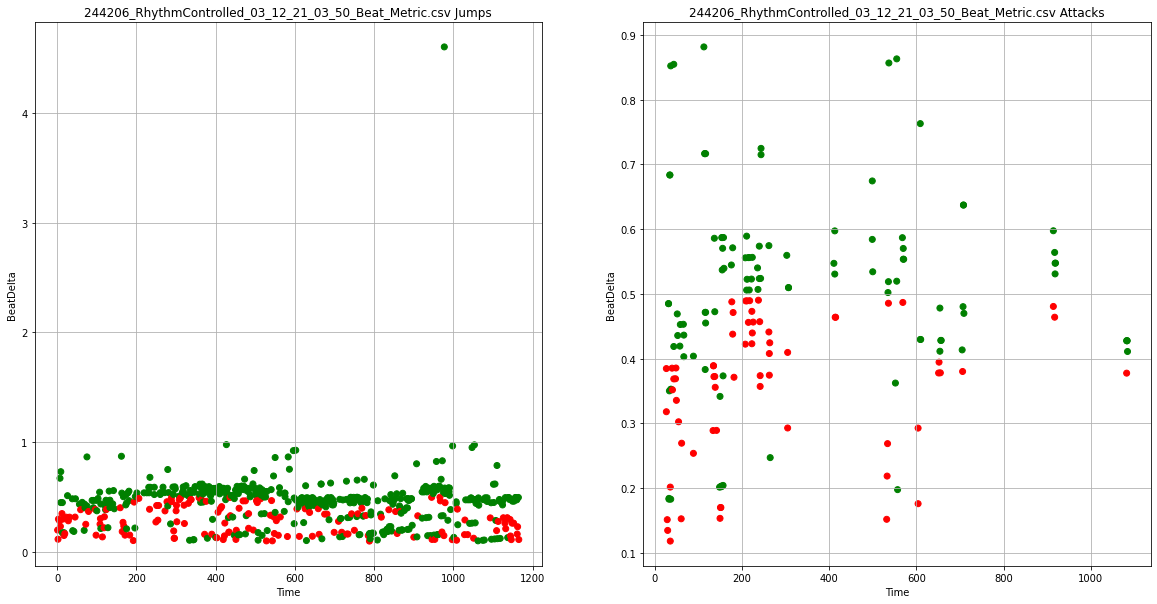

246229_NoRhythm_02_12_21_04_03_Beat_Metric.csv 246229_NoRhythm_02_12_21_04_03_Various_Metric.csv 246229_NoRhythm_02_12_21_04_03_Combat_Metric.csv
    Version  Time            Action
0  NoRhythm    12  Keyboard & Mouse


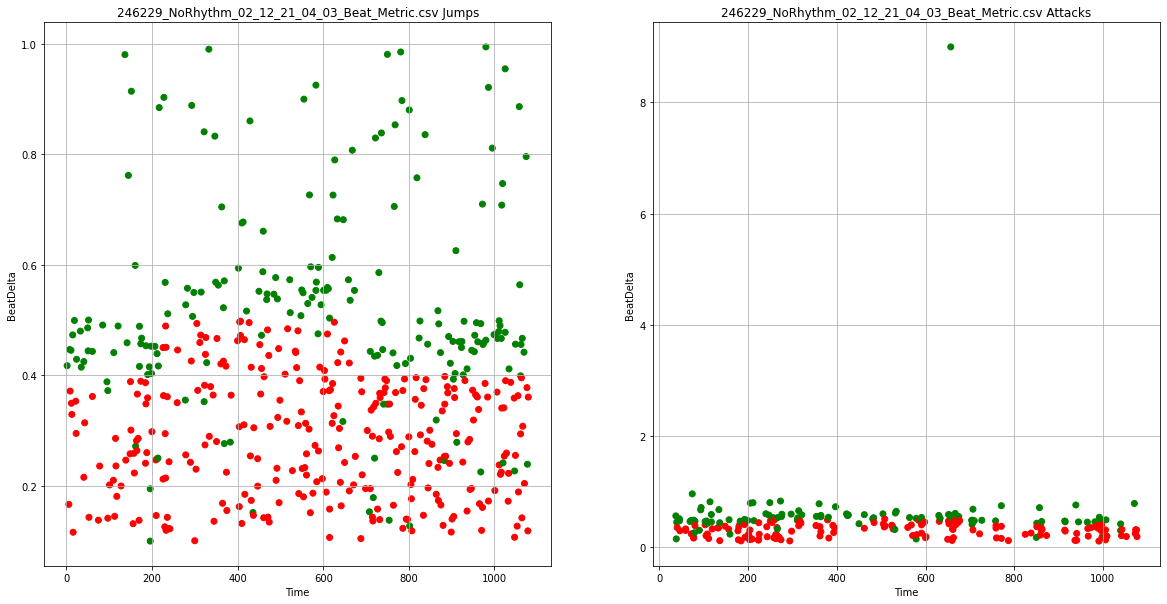

246229_RhythmControlled_02_12_21_04_30_Beat_Metric.csv 246229_RhythmControlled_02_12_21_04_30_Various_Metric.csv 246229_RhythmControlled_02_12_21_04_30_Combat_Metric.csv
            Version  Time            Action
0  RhythmControlled    11  Keyboard & Mouse


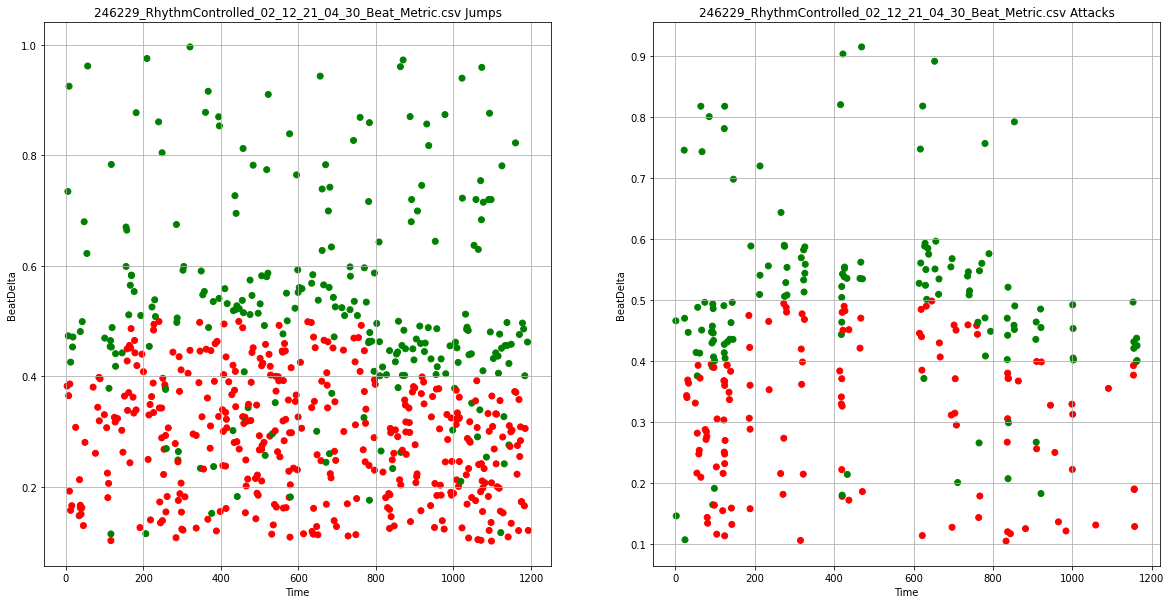

288786_NoRhythm_05_12_21_04_49_Beat_Metric.csv 288786_NoRhythm_05_12_21_04_49_Various_Metric.csv 288786_NoRhythm_05_12_21_04_49_Combat_Metric.csv
    Version  Time            Action
0  NoRhythm    12  Keyboard & Mouse


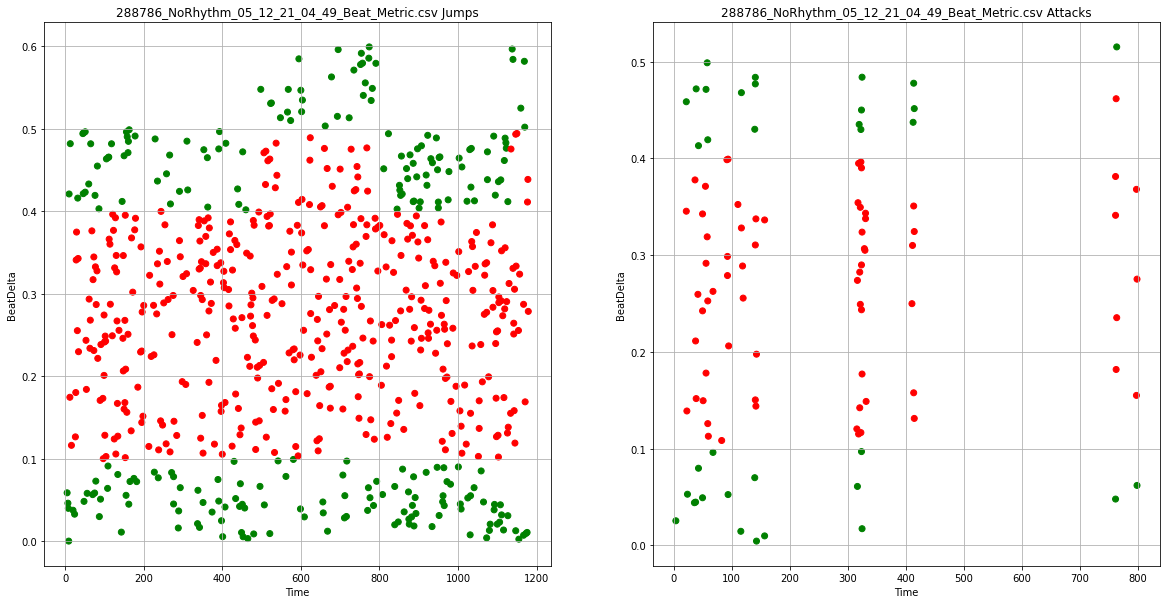

288786_RhythmControlled_05_12_21_04_21_Beat_Metric.csv 288786_RhythmControlled_05_12_21_04_21_Various_Metric.csv 288786_RhythmControlled_05_12_21_04_21_Combat_Metric.csv
            Version  Time            Action
0  RhythmControlled    13  Keyboard & Mouse


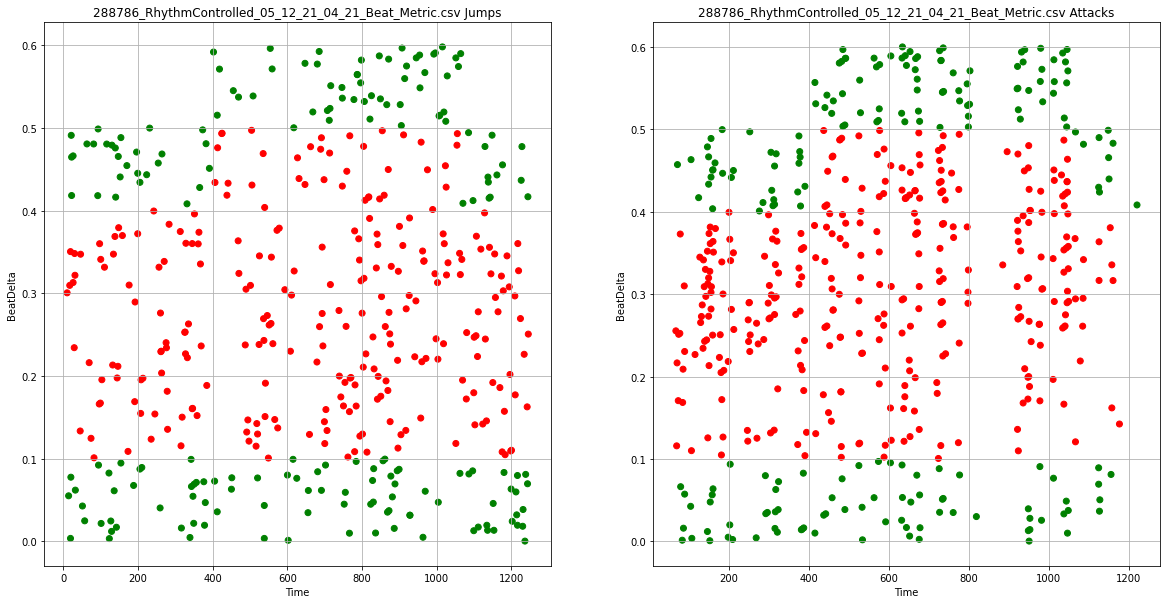

353252_NoRhythm_05_12_21_04_39_Beat_Metric.csv 353252_NoRhythm_05_12_21_04_39_Various_Metric.csv 353252_NoRhythm_05_12_21_04_39_Combat_Metric.csv
     Version  Time            Action
0   NoRhythm     8  Keyboard & Mouse
2   NoRhythm     0           Gamepad
39  NoRhythm   190  Keyboard & Mouse
40  NoRhythm   190           Gamepad


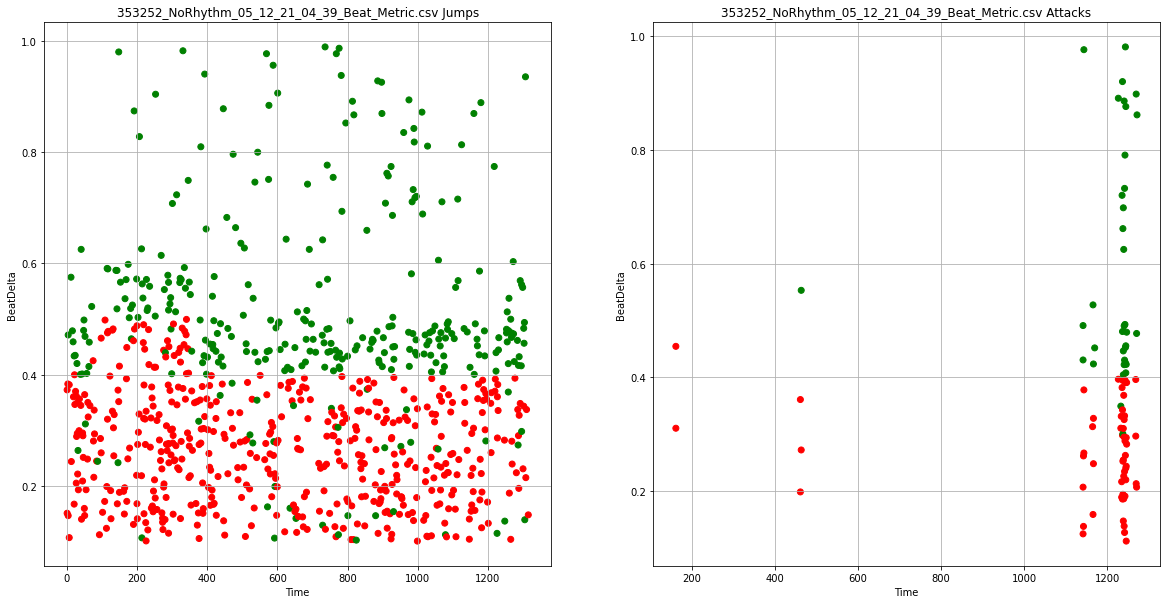

353252_RhythmControlled_05_12_21_04_13_Beat_Metric.csv 353252_RhythmControlled_05_12_21_04_13_Various_Metric.csv 353252_RhythmControlled_05_12_21_04_13_Combat_Metric.csv
            Version  Time            Action
0  RhythmControlled    11  Keyboard & Mouse
1  RhythmControlled     0           Gamepad


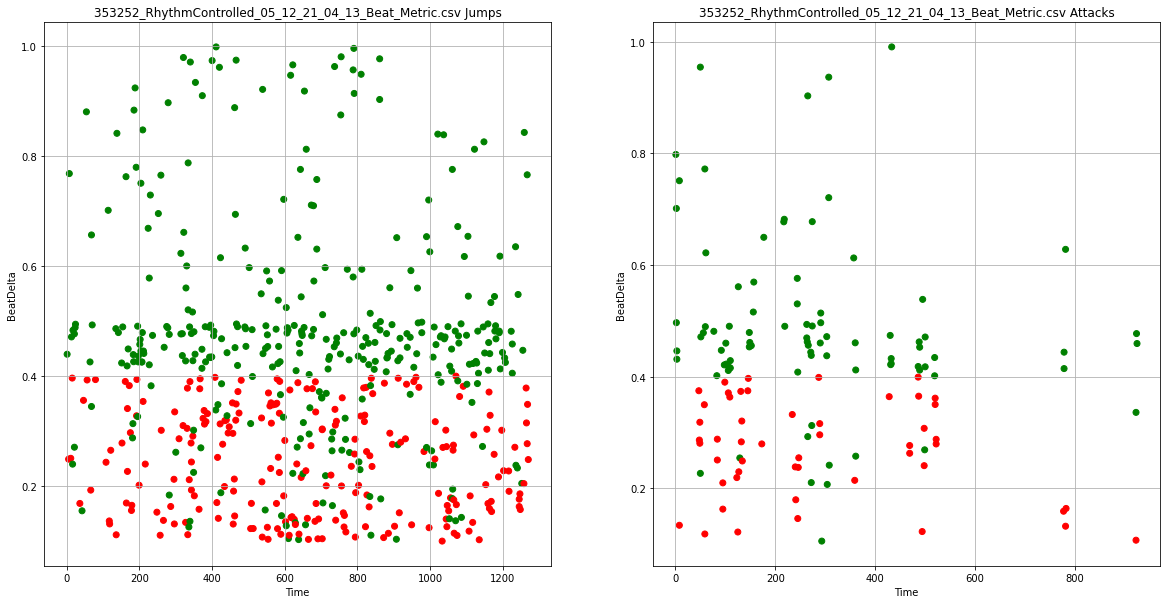

427217_NoRhythm_04_12_21_01_09_Beat_Metric.csv 427217_NoRhythm_04_12_21_01_09_Various_Metric.csv 427217_NoRhythm_04_12_21_01_09_Combat_Metric.csv
      Version  Time            Action
0    NoRhythm    12  Keyboard & Mouse
1    NoRhythm     0           Gamepad
30   NoRhythm   258  Keyboard & Mouse
31   NoRhythm   258           Gamepad
95   NoRhythm   784  Keyboard & Mouse
96   NoRhythm   803           Gamepad
145  NoRhythm  1166  Keyboard & Mouse


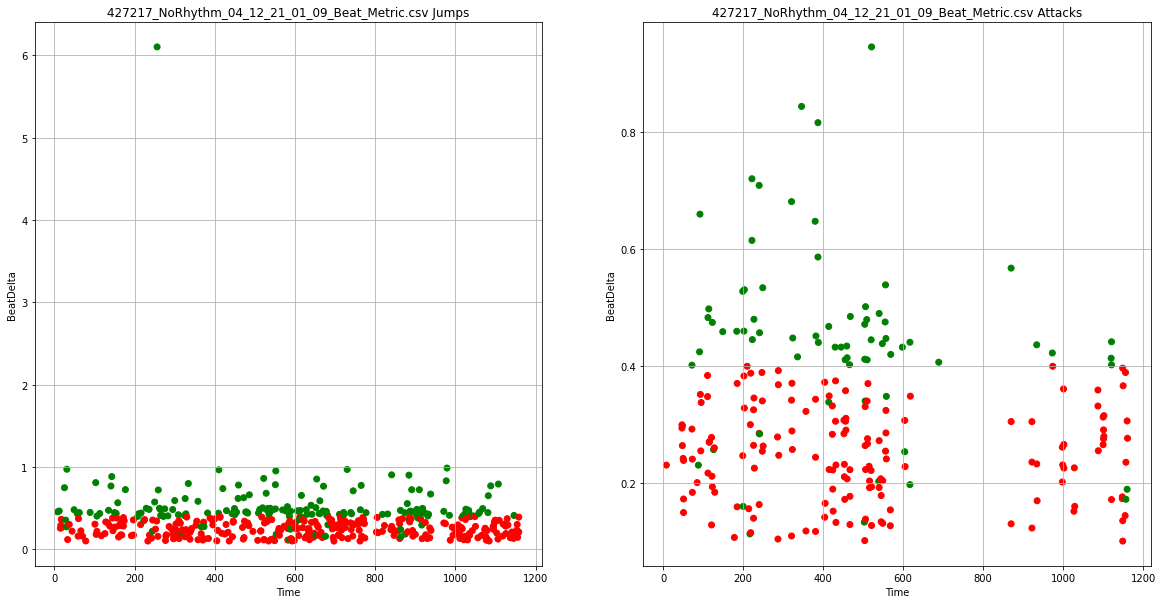

427217_RhythmControlled_04_12_21_02_02_Beat_Metric.csv 427217_RhythmControlled_04_12_21_02_02_Various_Metric.csv 427217_RhythmControlled_04_12_21_02_02_Combat_Metric.csv
              Version  Time            Action
0    RhythmControlled    35  Keyboard & Mouse
1    RhythmControlled     0           Gamepad
38   RhythmControlled   273  Keyboard & Mouse
39   RhythmControlled   273           Gamepad
139  RhythmControlled  1194  Keyboard & Mouse


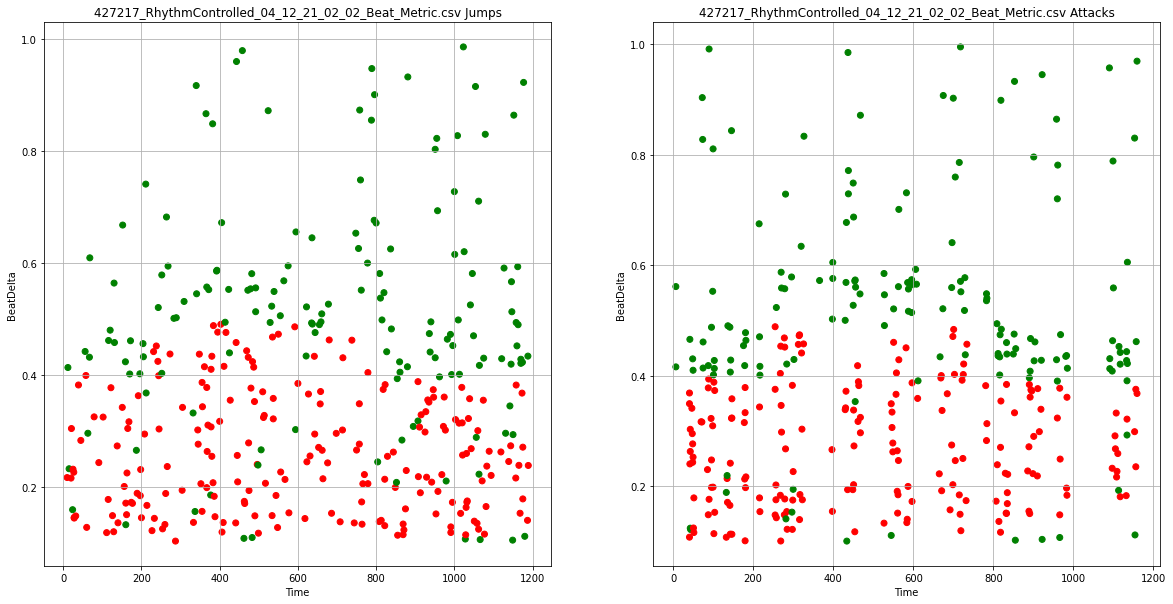

452042_NoRhythm_01_12_21_12_47_Beat_Metric.csv 452042_NoRhythm_01_12_21_12_47_Various_Metric.csv 452042_NoRhythm_01_12_21_12_47_Combat_Metric.csv
    Version  Time            Action
0  NoRhythm    12  Keyboard & Mouse


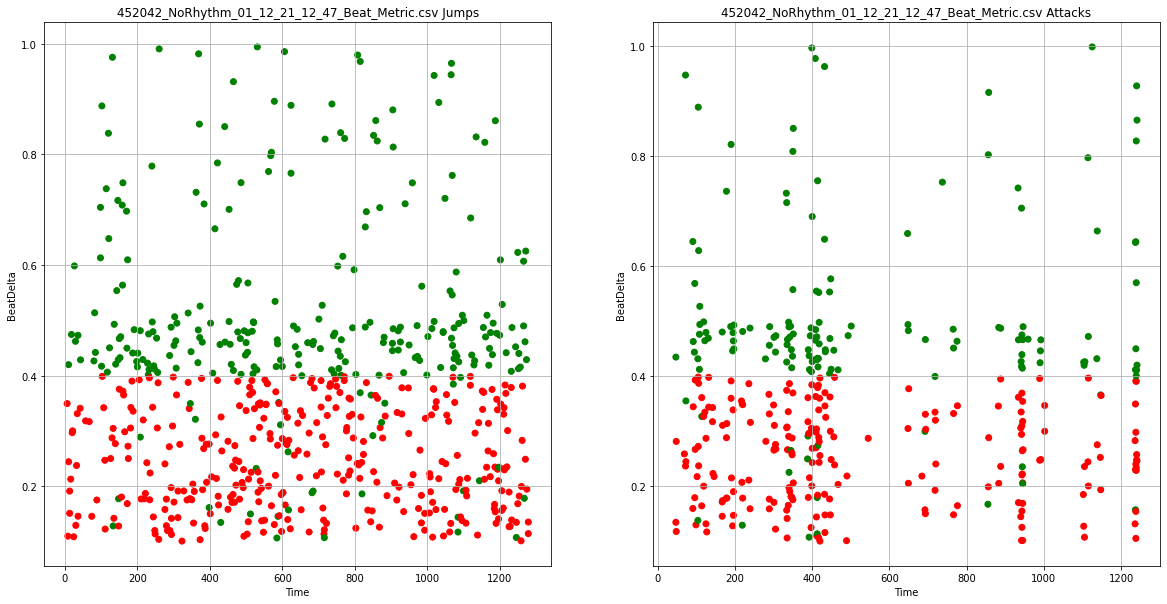

452042_RhythmControlled_01_12_21_01_19_Beat_Metric.csv 452042_RhythmControlled_01_12_21_01_19_Various_Metric.csv 452042_RhythmControlled_01_12_21_01_19_Combat_Metric.csv
            Version  Time            Action
0  RhythmControlled    12  Keyboard & Mouse


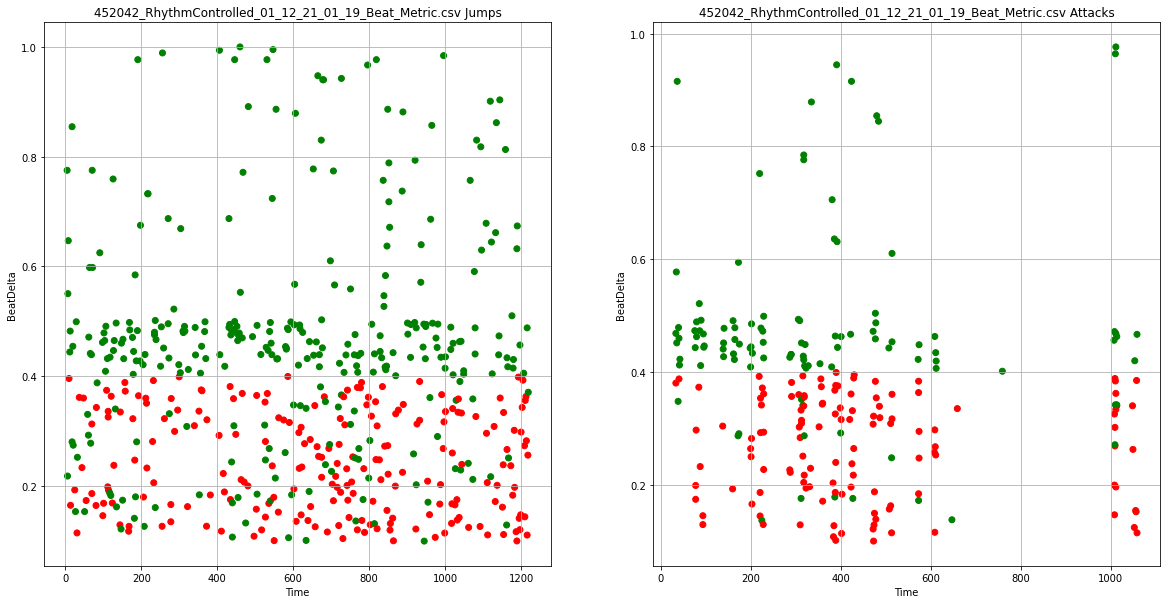

481091_NoRhythm_04_12_21_07_41_Beat_Metric.csv 481091_NoRhythm_04_12_21_07_41_Various_Metric.csv 481091_NoRhythm_04_12_21_07_41_Combat_Metric.csv
    Version  Time            Action
0  NoRhythm    17  Keyboard & Mouse


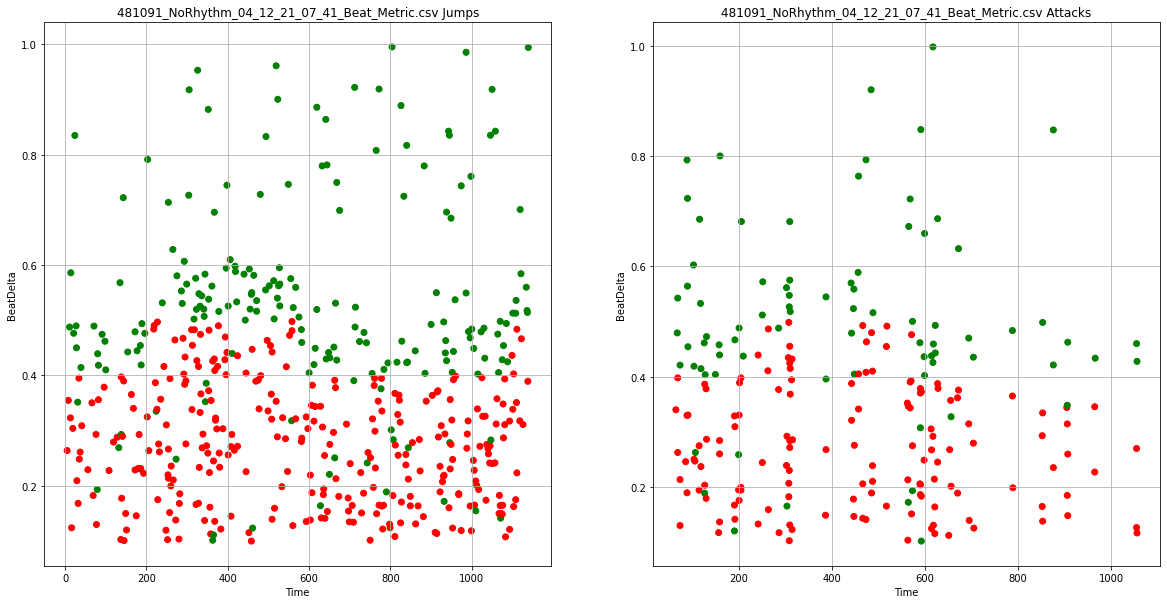

481091_RhythmControlled_04_12_21_08_10_Beat_Metric.csv 481091_RhythmControlled_04_12_21_08_10_Various_Metric.csv 481091_RhythmControlled_04_12_21_08_10_Combat_Metric.csv
            Version  Time            Action
0  RhythmControlled     9  Keyboard & Mouse


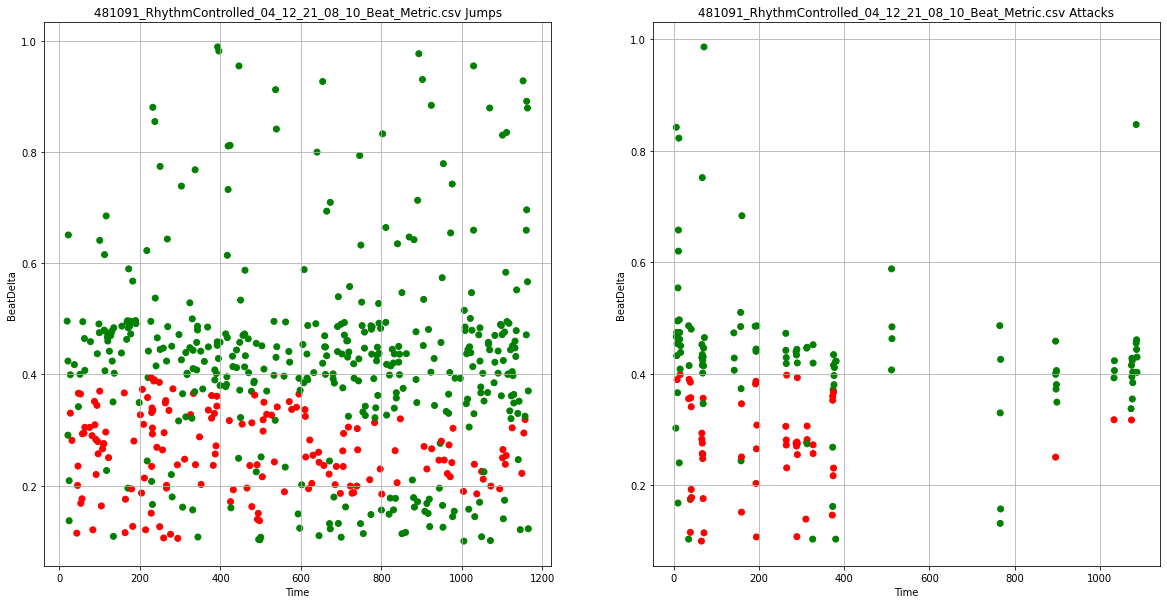

527704_NoRhythm_30_11_21_10_40_Beat_Metric.csv 527704_NoRhythm_30_11_21_10_40_Various_Metric.csv 527704_NoRhythm_30_11_21_10_40_Combat_Metric.csv
      Version  Time            Action
0    NoRhythm    19  Keyboard & Mouse
2    NoRhythm     3           Gamepad
188  NoRhythm  1213  Keyboard & Mouse


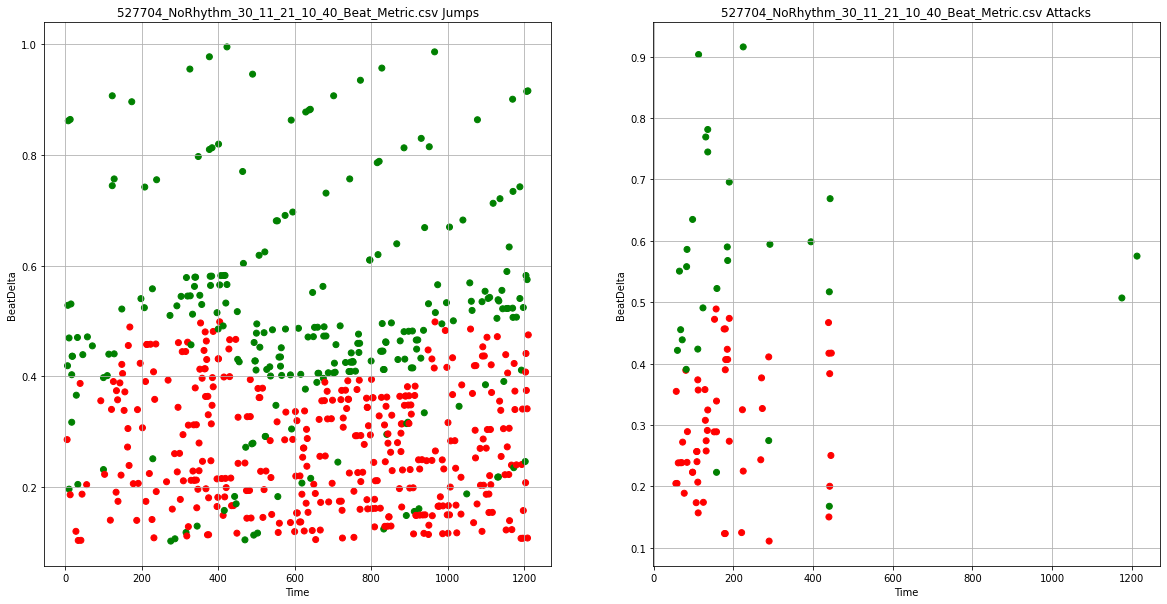

527704_RhythmControlled_30_11_21_10_11_Beat_Metric.csv 527704_RhythmControlled_30_11_21_10_11_Various_Metric.csv 527704_RhythmControlled_30_11_21_10_11_Combat_Metric.csv
              Version  Time            Action
0    RhythmControlled    23  Keyboard & Mouse
3    RhythmControlled     6           Gamepad
119  RhythmControlled  1139  Keyboard & Mouse


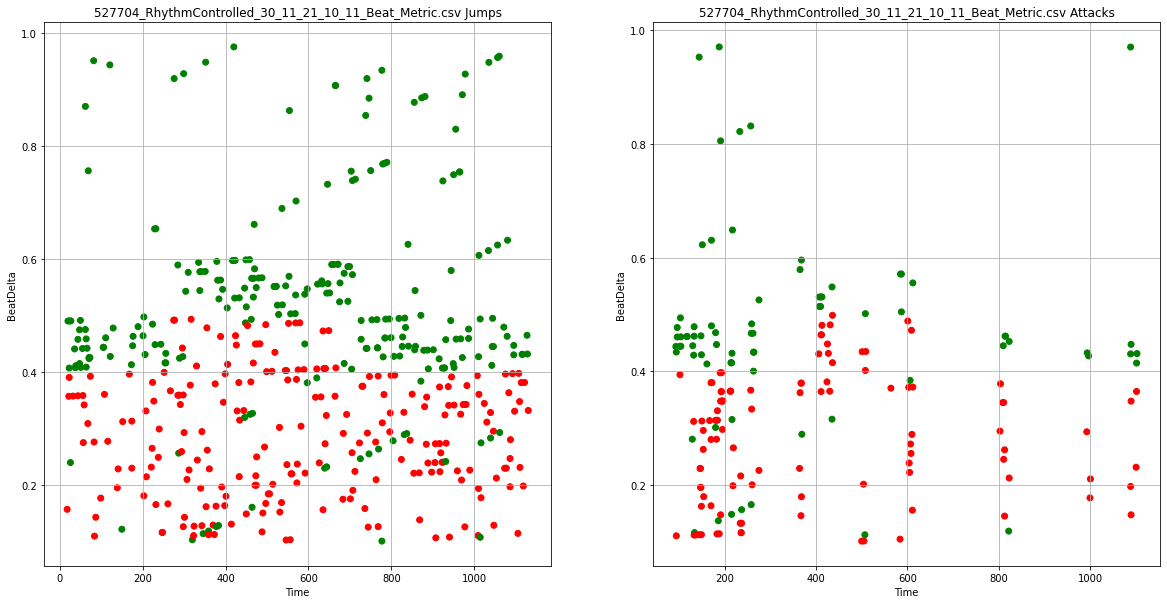

621162_NoRhythm_04_12_21_11_56_Beat_Metric.csv 621162_NoRhythm_04_12_21_11_56_Various_Metric.csv 621162_NoRhythm_04_12_21_11_56_Combat_Metric.csv
    Version  Time            Action
0  NoRhythm    17  Keyboard & Mouse


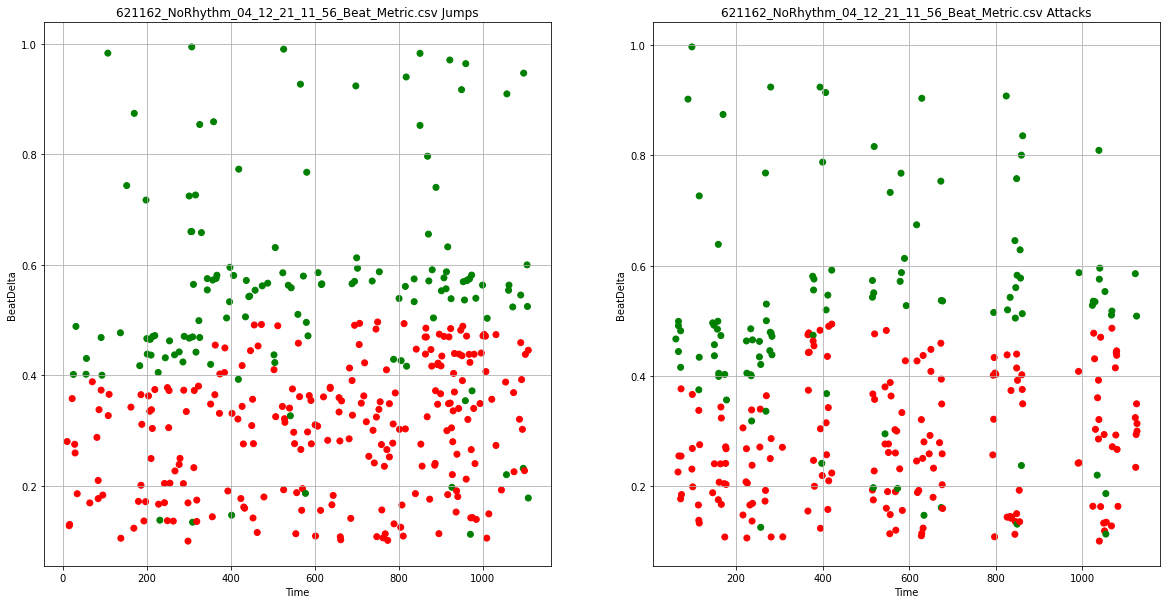

621162_RhythmControlled_04_12_21_12_35_Beat_Metric.csv 621162_RhythmControlled_04_12_21_12_35_Various_Metric.csv 621162_RhythmControlled_04_12_21_12_35_Combat_Metric.csv
            Version  Time            Action
0  RhythmControlled    14  Keyboard & Mouse


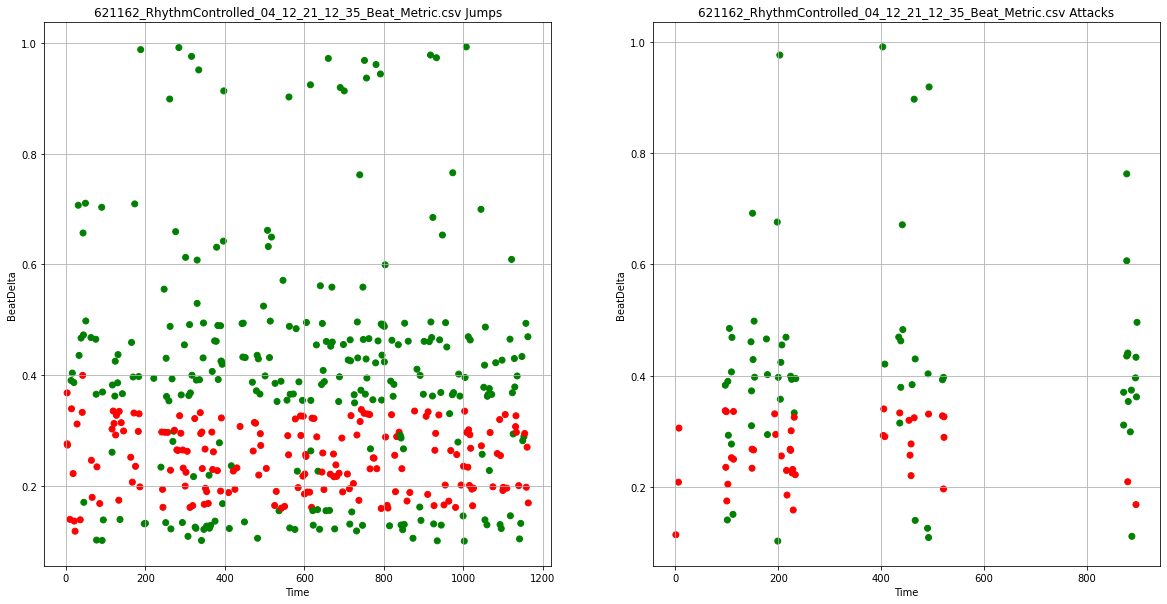

624794_NoRhythm_30_11_21_01_06_Beat_Metric.csv 624794_NoRhythm_30_11_21_01_06_Various_Metric.csv 624794_NoRhythm_30_11_21_01_06_Combat_Metric.csv
      Version  Time            Action
0    NoRhythm    20  Keyboard & Mouse
2    NoRhythm     4           Gamepad
86   NoRhythm   670  Keyboard & Mouse
88   NoRhythm   688           Gamepad
99   NoRhythm   738  Keyboard & Mouse
100  NoRhythm   738           Gamepad
101  NoRhythm   738  Keyboard & Mouse
102  NoRhythm   738           Gamepad
103  NoRhythm   739  Keyboard & Mouse
104  NoRhythm   739           Gamepad
107  NoRhythm   749  Keyboard & Mouse
109  NoRhythm   752           Gamepad
121  NoRhythm   853  Keyboard & Mouse
123  NoRhythm   855           Gamepad
147  NoRhythm  1067  Keyboard & Mouse


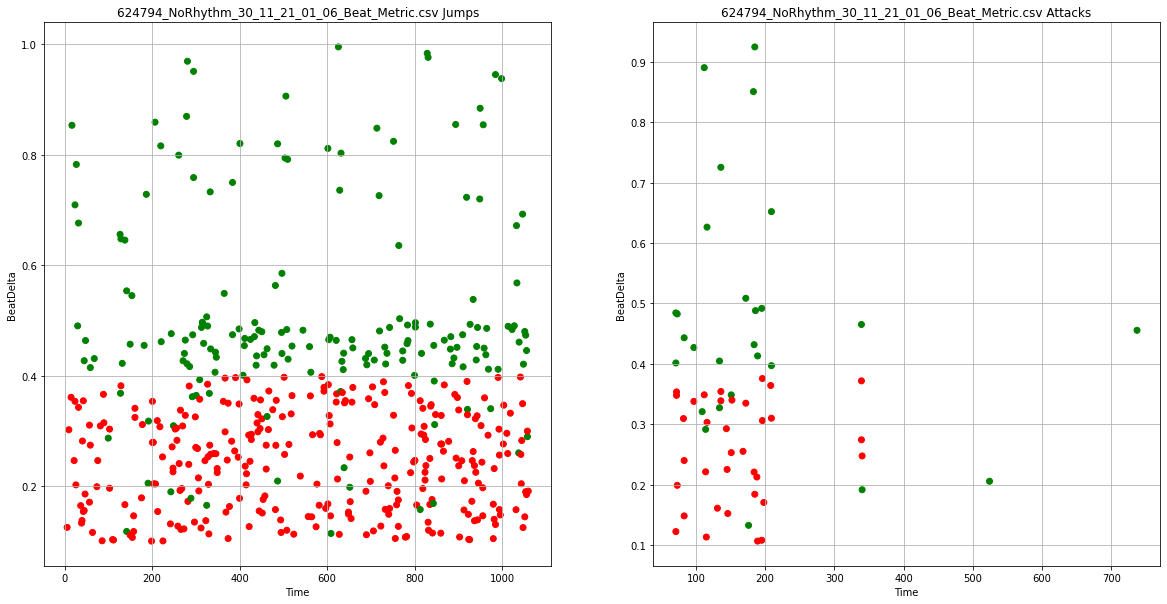

624794_RhythmControlled_30_11_21_01_33_Beat_Metric.csv 624794_RhythmControlled_30_11_21_01_33_Various_Metric.csv 624794_RhythmControlled_30_11_21_01_33_Combat_Metric.csv
              Version  Time            Action
0    RhythmControlled    13  Keyboard & Mouse
3    RhythmControlled     1           Gamepad
142  RhythmControlled  1231  Keyboard & Mouse
143  RhythmControlled  1238           Gamepad
144  RhythmControlled  1238  Keyboard & Mouse
146  RhythmControlled  1239           Gamepad
148  RhythmControlled  1265  Keyboard & Mouse
149  RhythmControlled  1266           Gamepad
151  RhythmControlled  1266  Keyboard & Mouse


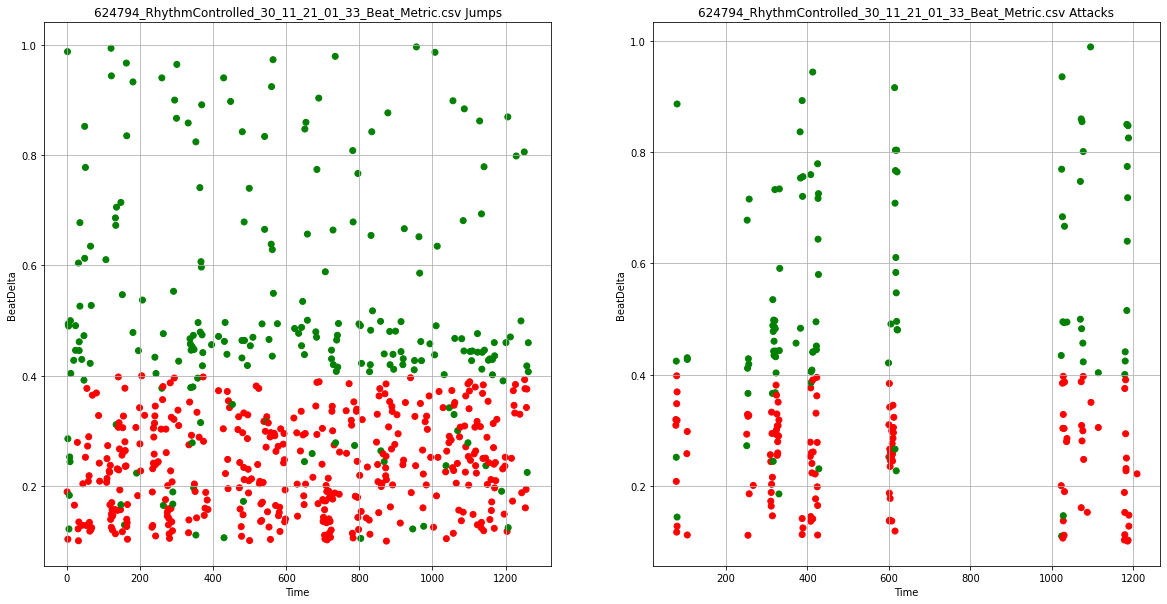

758980_NoRhythm_02_12_21_04_30_Beat_Metric.csv 758980_NoRhythm_02_12_21_04_30_Various_Metric.csv 758980_NoRhythm_02_12_21_04_30_Combat_Metric.csv
    Version  Time            Action
0  NoRhythm    11  Keyboard & Mouse


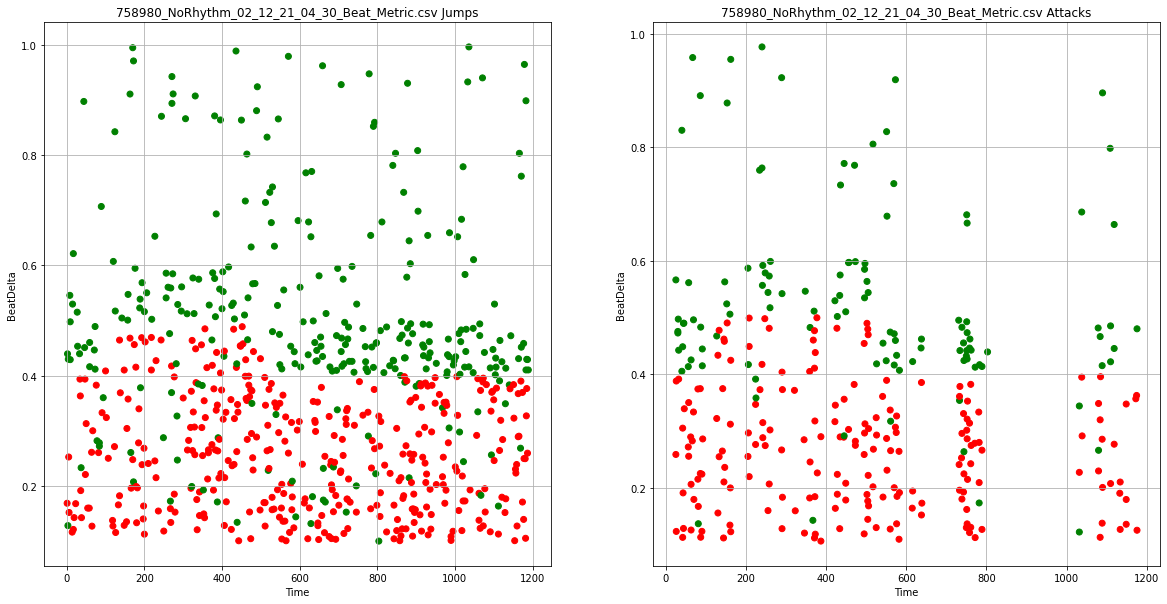

758980_RhythmControlled_02_12_21_04_01_Beat_Metric.csv 758980_RhythmControlled_02_12_21_04_01_Various_Metric.csv 758980_RhythmControlled_02_12_21_04_01_Combat_Metric.csv
            Version  Time            Action
0  RhythmControlled    12  Keyboard & Mouse


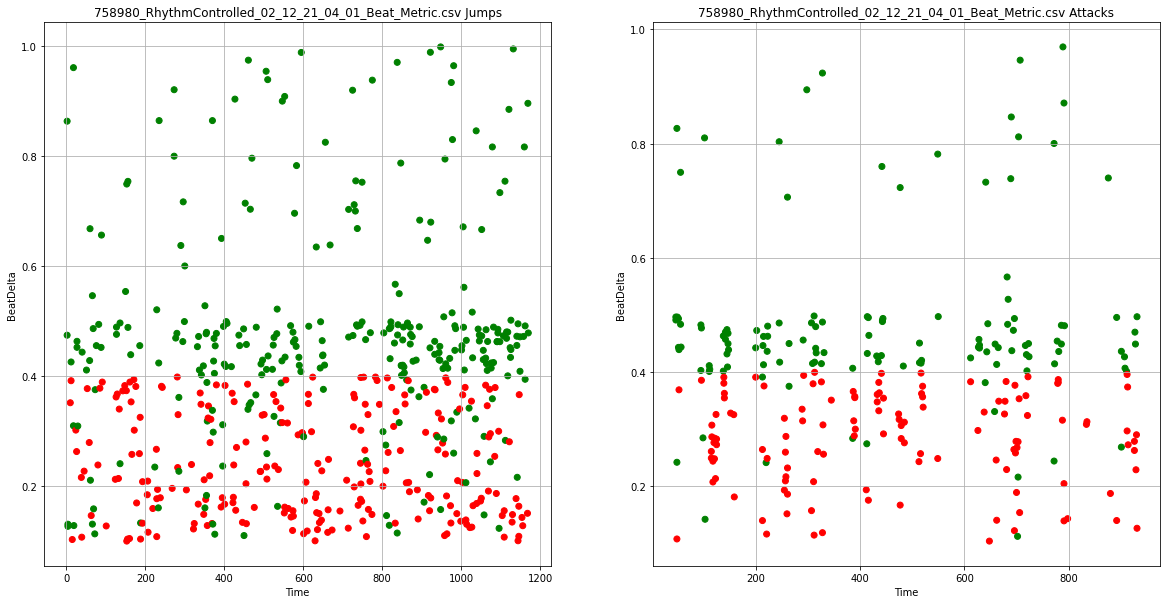

817336_NoRhythm_03_12_21_03_52_Beat_Metric.csv 817336_NoRhythm_03_12_21_03_52_Various_Metric.csv 817336_NoRhythm_03_12_21_03_52_Combat_Metric.csv
      Version  Time            Action
0    NoRhythm    13  Keyboard & Mouse
2    NoRhythm     0           Gamepad
170  NoRhythm  1192  Keyboard & Mouse
171  NoRhythm  1192           Gamepad
172  NoRhythm  1192  Keyboard & Mouse
173  NoRhythm  1192           Gamepad
174  NoRhythm  1192  Keyboard & Mouse
175  NoRhythm  1192           Gamepad
176  NoRhythm  1192  Keyboard & Mouse
177  NoRhythm  1192           Gamepad
178  NoRhythm  1192  Keyboard & Mouse
179  NoRhythm  1192           Gamepad


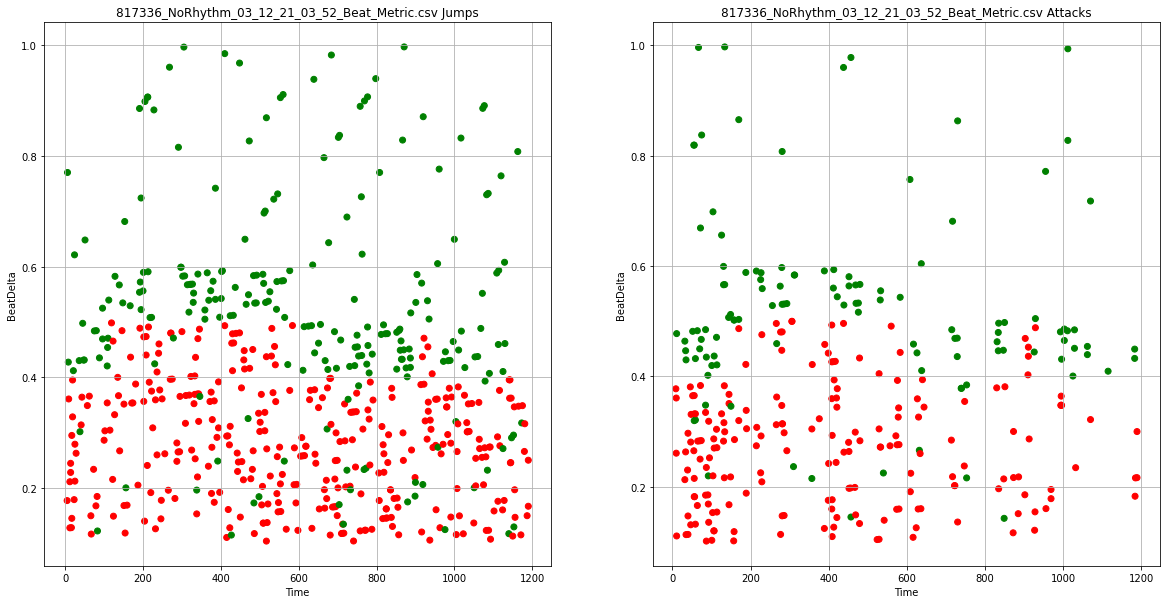

817336_RhythmControlled_03_12_21_03_25_Beat_Metric.csv 817336_RhythmControlled_03_12_21_03_25_Various_Metric.csv 817336_RhythmControlled_03_12_21_03_25_Combat_Metric.csv
              Version  Time            Action
0    RhythmControlled    17  Keyboard & Mouse
3    RhythmControlled     1           Gamepad
157  RhythmControlled  1217  Keyboard & Mouse


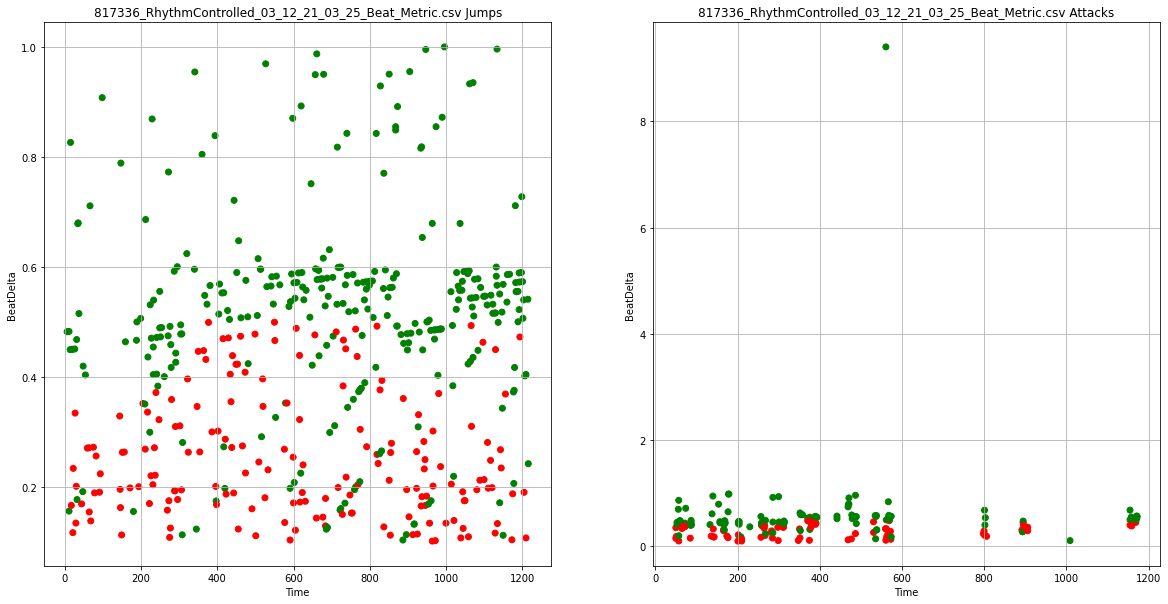

854472_NoRhythm_30_11_21_08_13_Beat_Metric.csv 854472_NoRhythm_30_11_21_08_13_Various_Metric.csv 854472_NoRhythm_30_11_21_08_13_Combat_Metric.csv
    Version  Time            Action
0  NoRhythm    35  Keyboard & Mouse


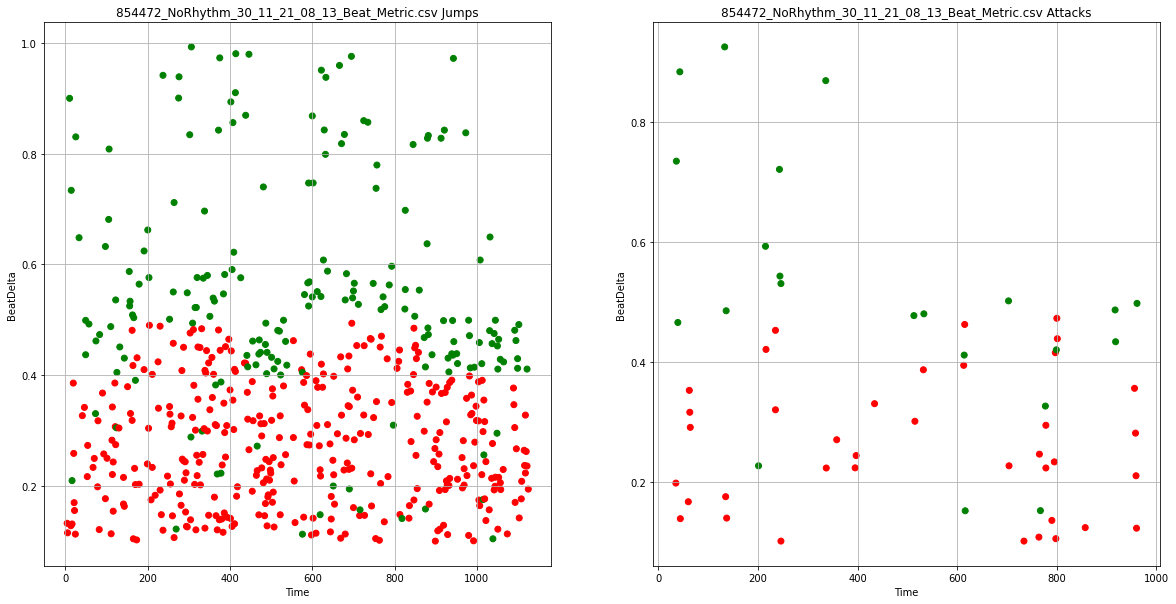

854472_RhythmControlled_30_11_21_07_45_Beat_Metric.csv 854472_RhythmControlled_30_11_21_07_45_Various_Metric.csv 854472_RhythmControlled_30_11_21_07_45_Combat_Metric.csv
            Version  Time            Action
0  RhythmControlled    13  Keyboard & Mouse


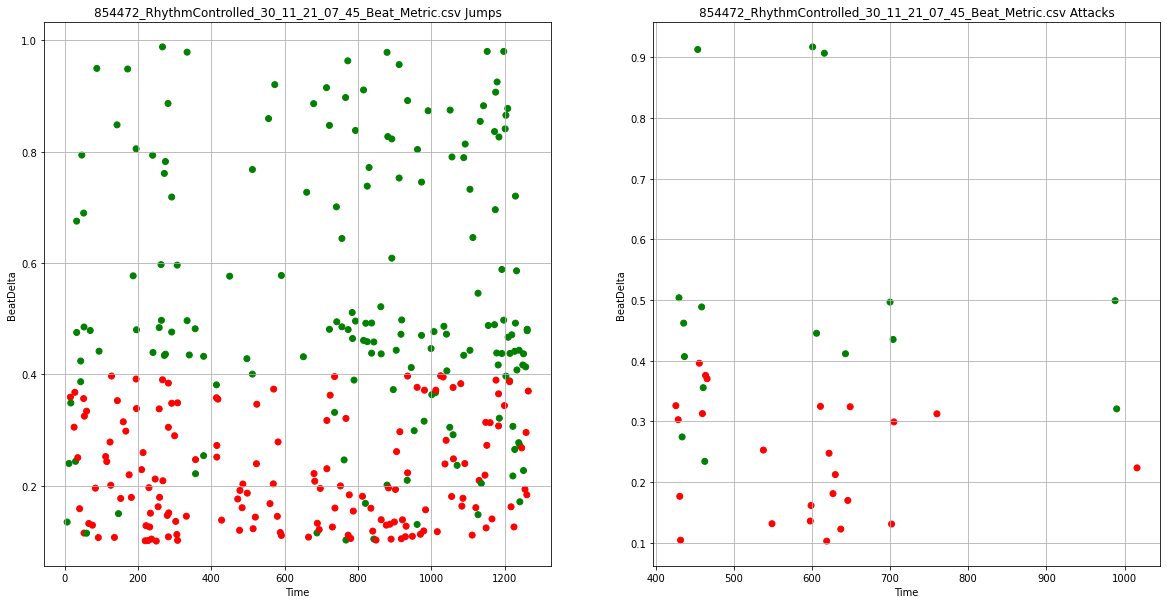

862197_NoRhythm_02_12_21_06_32_Beat_Metric.csv 862197_NoRhythm_02_12_21_06_32_Various_Metric.csv 862197_NoRhythm_02_12_21_06_32_Combat_Metric.csv
    Version  Time            Action
0  NoRhythm   114  Keyboard & Mouse


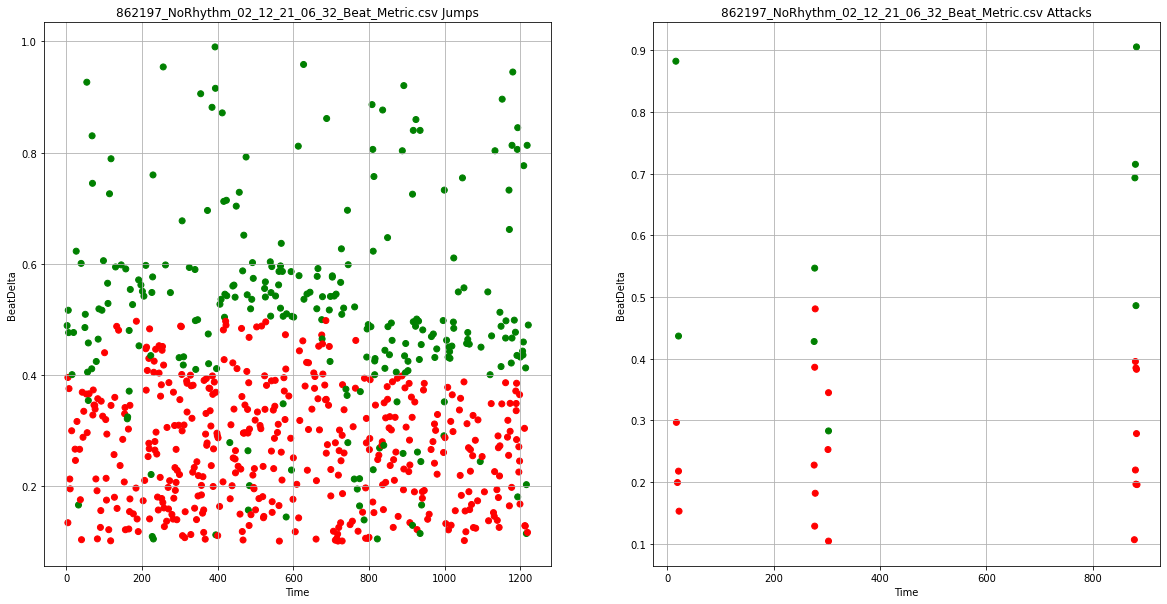

862197_RhythmControlled_02_12_21_06_04_Beat_Metric.csv 862197_RhythmControlled_02_12_21_06_04_Various_Metric.csv 862197_RhythmControlled_02_12_21_06_04_Combat_Metric.csv
            Version  Time            Action
0  RhythmControlled    12  Keyboard & Mouse


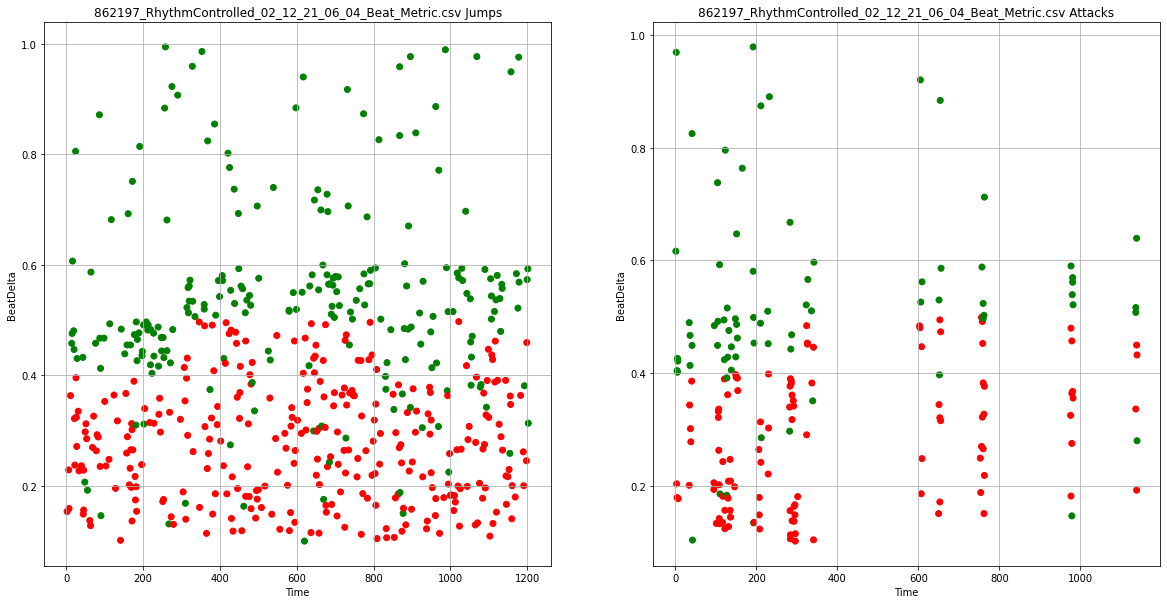

865172_NoRhythm_02_12_21_04_30_Beat_Metric.csv 865172_NoRhythm_02_12_21_04_30_Various_Metric.csv 865172_NoRhythm_02_12_21_04_30_Combat_Metric.csv
    Version  Time            Action
0  NoRhythm     9  Keyboard & Mouse


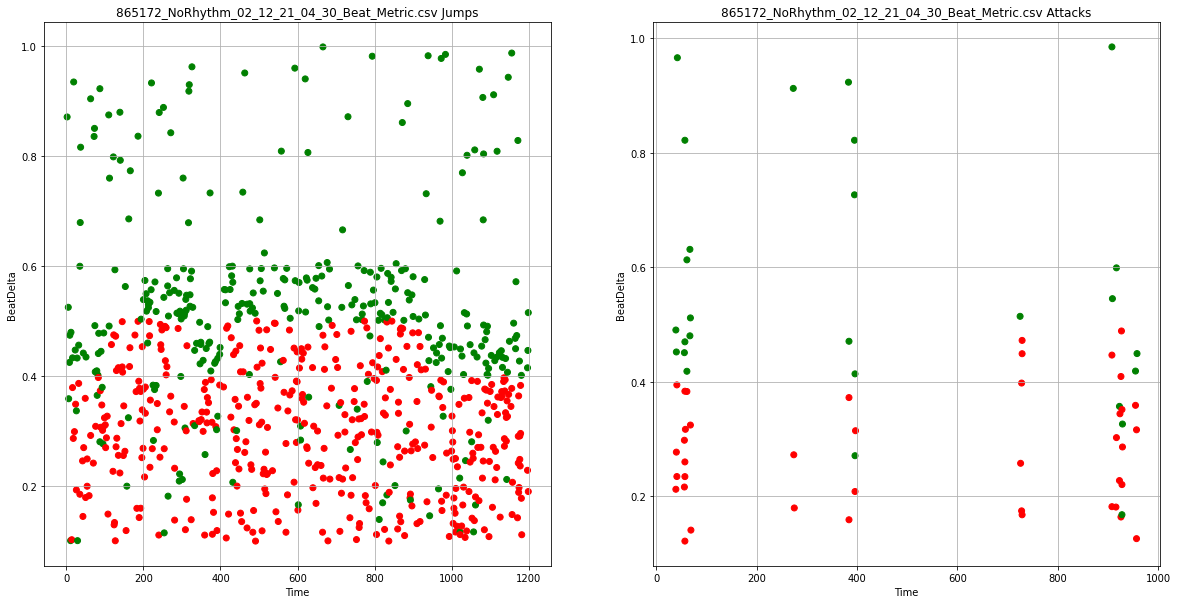

865172_RhythmControlled_02_12_21_03_59_Beat_Metric.csv 865172_RhythmControlled_02_12_21_03_59_Various_Metric.csv 865172_RhythmControlled_02_12_21_03_59_Combat_Metric.csv
            Version  Time            Action
0  RhythmControlled     8  Keyboard & Mouse


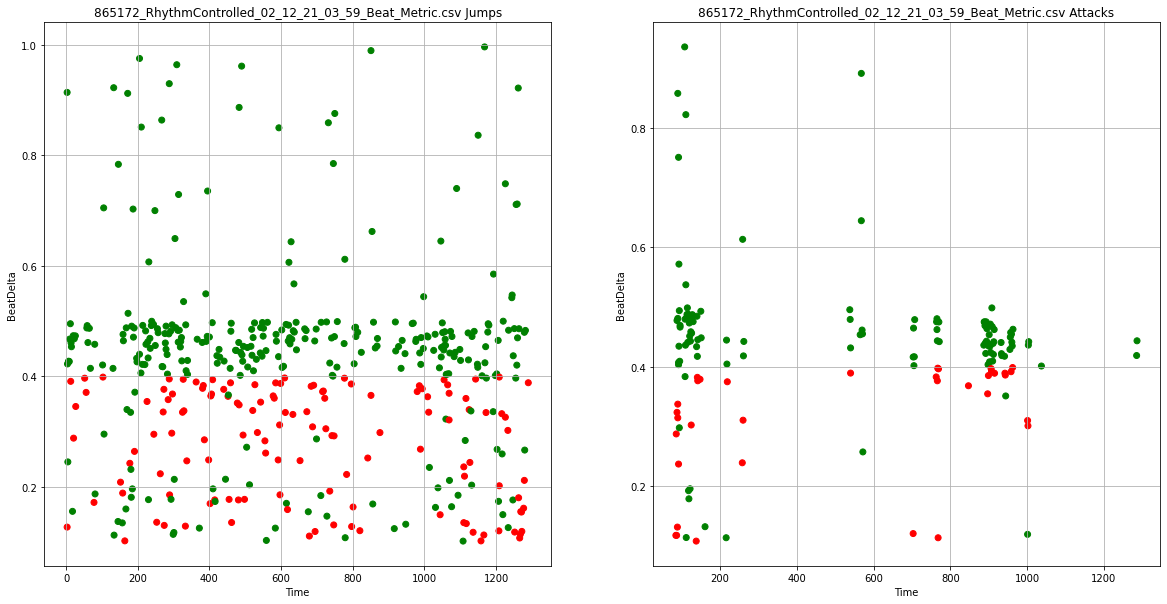

865850_NoRhythm_04_12_21_08_07_Beat_Metric.csv 865850_NoRhythm_04_12_21_08_07_Various_Metric.csv 865850_NoRhythm_04_12_21_08_07_Combat_Metric.csv
    Version  Time            Action
0  NoRhythm     9  Keyboard & Mouse


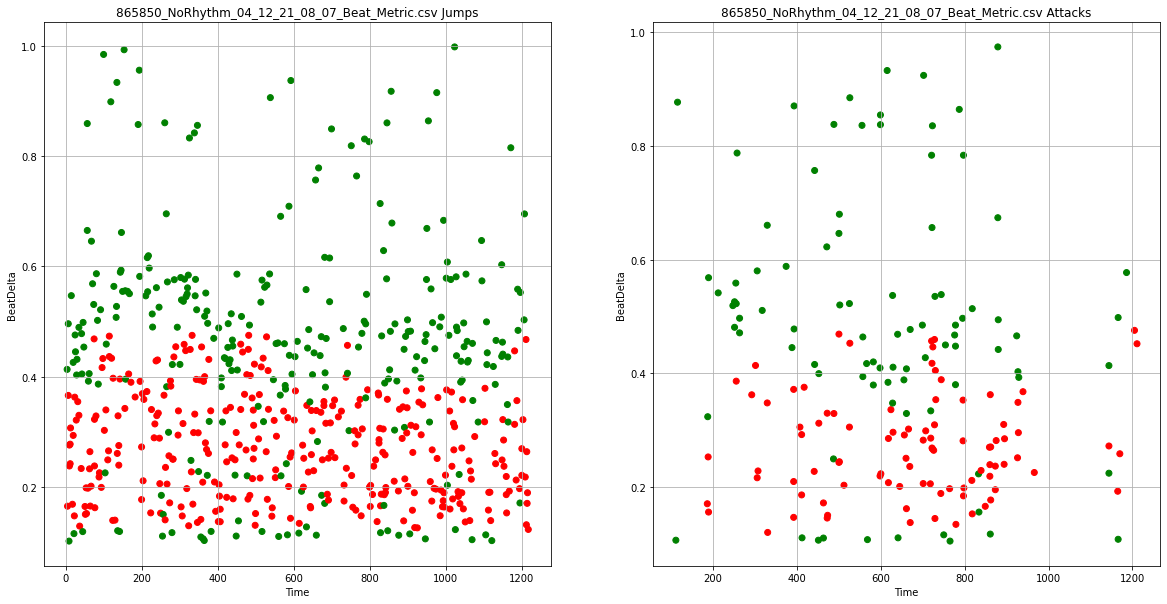

In [39]:

for beat, various, combat in zip(beat_metrics,various_metrics,combat_metrics):
    Analyse(beat, various, combat)